# Multi-label Classification

## Import Packages

In [ ]:
from IPython.display import display, HTML, Image

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import copy
import random


from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.metrics import hamming_loss

# to avoid future warnings for sklearn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.utils import shuffle


def shuffle_index(num_samples):
    a = range(0, num_samples)
    a = shuffle(a)
    length = int((num_samples + 1) / 2)
    train_index = a[:length]
    test_index = a[length:]
    return [train_index, test_index]


def load_csv(data_csv, label_csv):
    """
    :param csv_file_name: 
    :return: Data：
    """
    
    with open(data_csv, encoding='utf-8') as f:
        data = np.loadtxt(f, str, delimiter=",")
    with open(label_csv, encoding='utf-8') as f:
        label = np.loadtxt(f, str, delimiter=",")
    label = label.astype("int")
    num_samples = len(data)

    train_index, test_index = shuffle_index(num_samples)
   
    X_train = data[train_index]
    y_train = label[train_index]
    X_test = data[test_index]
    y_test = label[test_index]

    return X_train, y_train, X_test, y_test

In [ ]:
data_path = r'/content/drive/MyDrive/dataset/yeast_data.csv'
label_path = r'/content/drive/MyDrive/dataset/yeast_label.csv'

In [ ]:
# Read the CSV file
X = pd.read_csv(data_path)


header = []

for i in range(0, X.shape[1]):
    header.append('Att'+str(i))
print(header)
X.to_csv("data.csv", header=header, index=False)

X = pd.read_csv('data.csv')

print("Dataset.shape: " + str(X.shape))
y = pd.read_csv(label_path)

header = []

for i in range(0, y.shape[1]):
    header.append('Class'+str(i))
print(header)

y.to_csv("label.csv", header=header, index=False)

y = pd.read_csv('label.csv')


print("X.shape: " + str(X.shape))
display(X.head())
print("y.shape: " + str(y.shape))
display(y.head())
print("Descriptive stats:")
X.describe()

['Att0', 'Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att25', 'Att26', 'Att27', 'Att28', 'Att29', 'Att30', 'Att31', 'Att32', 'Att33', 'Att34', 'Att35', 'Att36', 'Att37', 'Att38', 'Att39', 'Att40', 'Att41', 'Att42', 'Att43', 'Att44', 'Att45', 'Att46', 'Att47', 'Att48', 'Att49', 'Att50', 'Att51', 'Att52', 'Att53', 'Att54', 'Att55', 'Att56', 'Att57', 'Att58', 'Att59', 'Att60', 'Att61', 'Att62', 'Att63', 'Att64', 'Att65', 'Att66', 'Att67', 'Att68', 'Att69', 'Att70', 'Att71', 'Att72', 'Att73', 'Att74', 'Att75', 'Att76', 'Att77', 'Att78', 'Att79', 'Att80', 'Att81', 'Att82', 'Att83', 'Att84', 'Att85', 'Att86', 'Att87', 'Att88', 'Att89', 'Att90', 'Att91', 'Att92', 'Att93', 'Att94', 'Att95', 'Att96', 'Att97', 'Att98', 'Att99', 'Att100', 'Att101', 'Att102']
Dataset.shape: (2416, 103)
['Class0', 'Class1', 'Class2', 'Class3', 'Class4', '

,Att0,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,...,Att93,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102
0,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,-0.055544,...,-0.001198,0.030594,-0.021814,0.010430,-0.013809,-0.009248,-0.027318,-0.014191,0.022783,0.123785
1,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,-0.053756,...,0.195777,0.022294,0.012583,0.002233,-0.002072,-0.010981,0.007615,-0.063378,-0.084181,-0.034402
2,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,-0.123053,...,0.001189,-0.066241,-0.046999,-0.066604,-0.055773,-0.041941,0.051066,0.004976,0.193972,0.131866
3,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,-0.111348,...,-0.035045,-0.080882,0.028468,-0.073576,0.050630,0.084832,-0.019570,-0.021650,-0.068326,-0.091155
4,0.052386,-0.077969,-0.065555,-0.044628,-0.005428,0.120818,0.051850,0.072627,0.107119,0.034214,...,-0.056235,0.187005,-0.053345,0.162630,0.141881,-0.055852,-0.075871,-0.066165,-0.027733,0.069023


y.shape: (2416, 14)


,Class0,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,1,1,0,0,0,0,0,0,0,0,1,1,0
2,0,0,1,1,0,0,0,0,0,0,0,1,1,1
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,1,1,0


Descriptive stats:


,Att0,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,...,Att93,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,...,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000
mean,0.001135,-0.000494,-0.000283,0.000262,0.001194,0.000525,0.001077,0.000418,0.001065,-0.000027,...,-0.000790,0.000472,-0.000501,0.000683,0.000340,-0.001491,-0.001026,-0.001522,0.000235,0.007556
std,0.097413,0.097864,0.097758,0.096989,0.096915,0.097296,0.097179,0.096823,0.096345,0.096821,...,0.093332,0.096703,0.096226,0.096651,0.096297,0.094388,0.096914,0.094227,0.093142,0.099359
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,-0.455191,-0.283594,-0.279408,-0.226420,-0.225374,-0.501572,-0.236589,-0.267052,-0.194079,-0.237752
25%,-0.053689,-0.058771,-0.057598,-0.057170,-0.058476,-0.060135,-0.058491,-0.062855,-0.063560,-0.065011,...,-0.054157,-0.056452,-0.056422,-0.059432,-0.058030,-0.053600,-0.063331,-0.059546,-0.054079,-0.077199
50%,0.003468,-0.003537,0.002850,-0.000172,0.005518,0.000386,0.006126,0.001423,0.003452,0.002378,...,-0.012933,-0.023597,-0.024312,-0.023023,-0.021937,-0.018219,-0.033615,-0.023481,-0.012015,0.022072
75%,0.057256,0.048045,0.060880,0.054533,0.065772,0.059962,0.068844,0.061512,0.064962,0.063160,...,0.027762,0.034969,0.036229,0.041436,0.035745,0.019640,0.038968,0.025432,0.028014,0.103146
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,0.609175,0.542867,0.547134,0.385928,0.540493,0.569250,0.509963,0.587358,0.700340,0.163431


### Split into Train and Test Set

In [ ]:
# Normalise the data
X = (X-X.min())/(X.max()-X.min())

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

X_train.shape: (1691, 103)
X_test.shape: (725, 103)
y_train.shape: (1691, 14)
y_test.shape: (725, 14)


## Task 1: Implement the Binary Relevance Algorithm

In [ ]:
class BinaryRelevanceClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=LogisticRegression()):
        self.base_classifier=base_classifier

    def fit(self, X, y):
        """Build a Binary Relevance classifier from the training set (X, y).
        Parameters
        ----------
        X : array-like or sparse matrix, shape = [n_samples, n_features]
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csc_matrix``.
        y : array-like, shape = [n_samples, n_labels] 
            The target values (class labels) as integers or strings.
        """

        # list of individual classifiers
        self.models = []
       
        # for every class label
        for label in list(y.columns):
            # Check that X and y have correct shape
            x_checked, y_checked = check_X_y(X, y[label])
            # every classifier is independent of the others
            # hence we create a copy of the base classifier instance
            base_model = clone(self.base_classifier)
            # fit the base model - one model each for Y1, Y2....Y14
            basel_model = base_model.fit(x_checked, y_checked)
            # add the fitted model list of individual classifiers
            self.models.append(base_model)

    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        X = check_array(X)
        
        all_preds = pd.DataFrame()
        i=0
        # list of individual classifier predictions
        preds = []
        
        # predict against each fitted model - one model per label
        for model in self.models:
            pred = model.predict(X)
            # add the prediction to the dataframe
            preds.append(pd.DataFrame({'Class'+ str(i+1): pred}))
            i+=1
        
        # dataframe with predictions for all class labels
        all_preds = pd.concat(preds, axis=1)
        # standard sklearn classifiers return predictions as numpy arrays
        # hence convert the dataframe to a numpy array
        return all_preds.to_numpy()
    


    def predict_proba(self,X):
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        X = check_array(X)
        
        all_preds = pd.DataFrame()
        i = 0
        
        for model in self.models:
            # Call predict_proba of the each base model
            pred = model.predict_proba(X)
            # Add the probabilities of 1 to the dataframe
            all_preds['Class'+str(i+1)] = [one_prob[1] for one_prob in pred]
            i+=1
        
        #return probabilities
        return all_preds.to_numpy()

### Predictions against the test data

In [ ]:
# instantiate the classifier
br_clf = BinaryRelevanceClassifier(LogisticRegression())
# fit
br_clf.fit(X_train, y_train)
# predict
y_pred = br_clf.predict(X_test)
print("y_pred.shape: " + str(y_pred.shape))

y_pred.shape: (725, 14)


### Custom Accuracy Measure for Classifiers

The Accuracy measure used here has been described in - "A Literature Survey on Algorithms for Multi-label Learning" by "Mohammad S Sorower".

In [ ]:
def accuracy_score(y_test, y_pred):
    # y_pred is a numpy array, y_test is a dataframe
    # to compare the two, convert to a single type
    y_test = y_test.to_numpy()
    
    # shape of test and preds must be equal
    assert y_test.shape == y_pred.shape
    i=0
    # list of scores for each training sample
    scores = []
    
    # for each test sample
    while i < len(y_test):
        count=0
        # count the number of matches in the sample
        # y_test[i] -> row values in test set (true values)
        # y_pred[i] -> row values in predictions set (predicted values)
        for p, q in zip(y_test[i], y_pred[i]):
            if p == q:
                count += 1

        # accuracy score for the sample = no. of correctly predicted labels/total no. of labels
        scores.append(count / y_pred.shape[1])
        i+=1 

    # final accuracy = avg. accuracy over all test samples =
    # sum of the accuracy of all training samples/no. of training samples
    return round((sum(scores)/len(y_test)), 5)

In [ ]:
print("Accuracy of Binary Relevance Classifier: " + str(accuracy_score(y_test, y_pred)))

Accuracy of Binary Relevance Classifier: 0.78542


### Experiment with different Base Classifiers - GridSearch

In [ ]:
cv_folds=5

# Set up the parameter grid to search
param_grid ={'base_classifier': [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
                                 RandomForestClassifier(criterion='entropy'),
                                 LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()] }

# Perform the search
# Using the custom accuracy function defined earlier
tuned_model = GridSearchCV(BinaryRelevanceClassifier(), \
                            param_grid, scoring=make_scorer(accuracy_score), verbose = 2, n_jobs = -1, cv=cv_folds)
tuned_model.fit(X_train, y_train)

# Print details of the best model
print("Best Parameters Found: ")
display(tuned_model.best_params_)
display(tuned_model.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters Found: 


{'base_classifier': SVC()}

0.815366

### Evaluate the best model against the Test Data

In [ ]:
# instantiate the classifier
br_clf = BinaryRelevanceClassifier(LogisticRegression(max_iter=20000))
# fit
br_clf.fit(X_train, y_train)
# predict
y_pred = br_clf.predict(X_test)
print("y_pred.shape: " + str(y_pred.shape))

y_pred.shape: (725, 14)


In [ ]:
print("Accuracy of Binary Relevance Classifier - Best Model: " + str(accuracy_score(y_test, y_pred)))

Accuracy of Binary Relevance Classifier - Best Model: 0.78562


## Task 2: Implement the Binary Relevance Algorithm with Under-Sampling

In [ ]:
class BinaryRelevanceClassifierUS(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=LogisticRegression(max_iter=20000)):
        self.base_classifier=base_classifier

    def fit(self, X, y):
        """Build a Binary Relevance classifier with Under sampling from the training set (X, y).
        Parameters
        ----------
        X : array-like or sparse matrix, shape = [n_samples, n_features]
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csc_matrix``.
        y : array-like, shape = [n_samples] 
            The target values (class labels) as integers or strings.
        """

        # list of individual classifiers
        self.models = []
        
        # for each class label
        for label in list(y.columns):
            
            X_cp = X.copy()
            # pick the column values for the label
            y_cp = y[label]
            
            # sampling is done on both X and y, hence join the two dataframes
            X_y_data = pd.concat([X_cp, y_cp], axis=1)
            
            # counters for 0 values and 1 values
            n_val0, n_val1 = 0,0
            
            j=0
            # for each sample
            while j<len(X_y_data):
                # if value for the label is 0
                if(X_y_data.iloc[j][label] == 0):
                    n_val0+=1
                else:
                    # value 1
                    n_val1+=1
                j+=1
            
            # under sample the majority class
            # randomly pick samples from majority class equal to the number of samples in the minority class
            # both the classes will have the same number of samples
            if n_val0 > n_val1:
                # majority 0 values
                val1 = X_y_data[X_y_data[label]==1]
                val0 = X_y_data[X_y_data[label]==0].sample(n_val1)
                
                X_y_data = pd.concat([val0, val1], axis=0)
            
            elif n_val1 > n_val0:
                # majority 1 values
                val1 = X_y_data[X_y_data[label]==1].sample(n_val0)
                val0 = X_y_data[X_y_data[label]==0]
                
                X_y_data = pd.concat([val0, val1], axis=0)
            
            # split back into X and y
            X_cp = X_y_data.iloc[:, :-1]
            y_cp = X_y_data.iloc[:, -1]
            
            base_model = clone(self.base_classifier)
            # fit the base model - one model each for Y1, Y2....Y14
            a, b = check_X_y(X_cp, y_cp)
            base_model.fit(a, b)
            # list of individual classifiers classifiers
            self.models.append(base_model)


    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        X = check_array(X)
        
        all_preds = pd.DataFrame()
        i=0
        # list of individual classifier predictions
        preds = []
        
        # for every fitted model
        for model in self.models:
            # predict for X
            pred = model.predict(X)
            # add to the list of predictions
            preds.append(pd.DataFrame({'Class'+ str(i+1): pred}))
            i+=1
        
        # store predictions for each label in a single dataframe
        all_preds = pd.concat(preds, axis=1)
        # standard sklearn classifiers return predictions as numpy arrays
        # hence convert the dataframe to a numpy array
        return all_preds.to_numpy()
    
    
    def predict_proba(self,X):
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        X = check_array(X)
        
        all_preds = pd.DataFrame()
        i = 0
        
        for model in self.models:
            # Call predict_proba of the each base model
            pred = model.predict_proba(X)
            # Add the probabilities of 1 to the dataframe
            all_preds['Class'+str(i+1)] = [one_prob[1] for one_prob in pred]
            i+=1
        
        #return probabilities
        return all_preds.to_numpy()

### Prediction against the Test Data

In [ ]:
brus_clf = BinaryRelevanceClassifierUS()
# fit
brus_clf.fit(X_train, y_train)
# predict
y_pred = brus_clf.predict(X_test)
print("y_pred.shape=" + str(y_pred.shape))

y_pred.shape=(725, 14)


### Calculate the Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Binary Relevance Classifier with Under-sampling: " + str(accuracy))

Accuracy of Binary Relevance Classifier with Under-sampling: 0.60709


### Experiment with different Base Classifiers - GridSearch

In [ ]:
cv_folds=5

# Set up the parameter grid to search
param_grid ={'base_classifier': [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
                                 RandomForestClassifier(criterion='entropy'),
                                 LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()] }

# Perform the search
tuned_model = GridSearchCV(BinaryRelevanceClassifierUS(), \
                            param_grid, scoring=make_scorer(accuracy_score), verbose = 2, n_jobs = -1, cv=cv_folds)
tuned_model.fit(X_train, y_train)

# Print details
print("Best Parameters Found: ")
display(tuned_model.best_params_)
display(tuned_model.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters Found: 


{'base_classifier': RandomForestClassifier(criterion='entropy')}

0.648602

### Evaluate the best model against the Test Data

In [ ]:
brus_clf = BinaryRelevanceClassifierUS(RandomForestClassifier(criterion='entropy'))
# fit
brus_clf.fit(X_train, y_train)
# predict
y_pred = brus_clf.predict(X_test)
print("y_pred.shape=" + str(y_pred.shape))

y_pred.shape=(725, 14)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Binary Relevance Classifier with Under-sampling - Best Model: " + str(accuracy))

Accuracy of Binary Relevance Classifier with Under-sampling - Best Model: 0.62877


## Task 3: Compare the Performance of Different Binary Relevance Approaches

### Accuracy and F-1 Scores

In [ ]:
# list of base models
base_models = [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
               RandomForestClassifier(criterion='entropy'),
               LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(n_neighbors=4), SVC()]
base_model_names = ["Decision Tree", "Random Forest", "Logistic Regression", "GaussianNB", "kNN", "SVM"]

# store accuracy scores
br_clf_accuracies = dict()
br_clfus_accuracies = dict()

# store F1 scores
br_clf_f1 = dict()
br_clfus_f1 = dict()

# store hamming scores
br_clf_ham = dict()
br_clfus_ham = dict()

i=0
for clf in base_models:
    # without undersampling
    br_clf = BinaryRelevanceClassifier(clf)
    br_clf.fit(X_train, y_train)
    br_y_pred = br_clf.predict(X_test)

    # find accuracy using custom accuracy function defined
    accuracy = accuracy_score(y_test, br_y_pred)
    br_clf_accuracies[base_model_names[i]] = accuracy

    # find f1 score using sklearn
    y_pred_df = pd.DataFrame(br_y_pred)
    f1_score_br = metrics.f1_score(y_test, y_pred_df, average='macro')
    br_clf_f1[base_model_names[i]] = f1_score_br

    # hamming
    hamming = hamming_loss(y_test, br_y_pred)
    br_clf_ham[base_model_names[i]] = hamming

    # with undersampling
    brus_clf = BinaryRelevanceClassifierUS(clf)
    brus_clf.fit(X_train, y_train)
    brus_y_pred = brus_clf.predict(X_test)
    
    # find accuracy using custom accuracy function defined
    accuracy_us = accuracy_score(y_test, brus_y_pred)
    br_clfus_accuracies[base_model_names[i]] = accuracy_us
    
    # find f1 score using sklearn
    y_pred_df = pd.DataFrame(brus_y_pred)
    f1_score_us = metrics.f1_score(y_test, y_pred_df, average='macro')
    br_clfus_f1[base_model_names[i]] = f1_score_us
    
    # hamming score
    hamming_us = hamming_loss(y_test, brus_y_pred)
    br_clfus_ham[base_model_names[i]] = hamming_us

    i+=1

print("===================Accuracy Scores=====================")
print("Binary Relevance")
display(br_clf_accuracies)
print("Binary Relevance with Under-Sampling")
display(br_clfus_accuracies)

print("======================F1 Scores========================")
print("Binary Relevance")
display(br_clf_f1)
print("Binary Relevance with Under-Sampling")
display(br_clfus_f1)

print("======================Hamming Loss========================")
print("Binary Relevance")
display(br_clf_ham)
print("Binary Relevance with Under-Sampling")
display(br_clfus_ham)

===================Accuracy Scores=====================
Binary Relevance


{'Decision Tree': 0.71419,
 'Random Forest': 0.79675,
 'Logistic Regression': 0.78562,
 'GaussianNB': 0.67596,
 'kNN': 0.7799,
 'SVM': 0.79498}

Binary Relevance with Under-Sampling


{'Decision Tree': 0.57488,
 'Random Forest': 0.63429,
 'Logistic Regression': 0.62118,
 'GaussianNB': 0.60227,
 'kNN': 0.66867,
 'SVM': 0.62631}

======================F1 Scores========================
Binary Relevance


{'Decision Tree': 0.37205137865718785,
 'Random Forest': 0.33961609493205847,
 'Logistic Regression': 0.33938178009885295,
 'GaussianNB': 0.4316627679083272,
 'kNN': 0.353415071415573,
 'SVM': 0.32787742663955644}

Binary Relevance with Under-Sampling


{'Decision Tree': 0.3896751873697854,
 'Random Forest': 0.45648651643790894,
 'Logistic Regression': 0.44346054877187635,
 'GaussianNB': 0.4250478803948921,
 'kNN': 0.427125836416144,
 'SVM': 0.45050218652543356}

======================Hamming Loss========================
Binary Relevance


{'Decision Tree': 0.2858128078817734,
 'Random Forest': 0.2032512315270936,
 'Logistic Regression': 0.21438423645320198,
 'GaussianNB': 0.32403940886699506,
 'kNN': 0.22009852216748768,
 'SVM': 0.20502463054187192}

Binary Relevance with Under-Sampling


{'Decision Tree': 0.42512315270935963,
 'Random Forest': 0.3657142857142857,
 'Logistic Regression': 0.3788177339901478,
 'GaussianNB': 0.39773399014778327,
 'kNN': 0.3313300492610837,
 'SVM': 0.3736945812807882}

### Plot the Accuracy  Scores

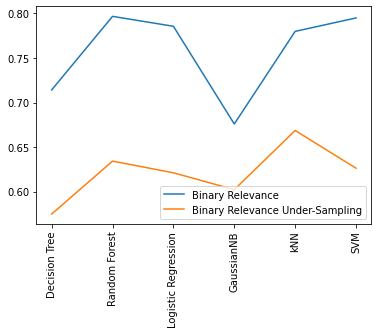

In [ ]:
plt.plot(list(br_clf_accuracies.keys()), list(br_clf_accuracies.values()))
plt.plot(list(br_clfus_accuracies.keys()), list(br_clfus_accuracies.values()))
plt.xticks(rotation=90)
plt.legend(['Binary Relevance','Binary Relevance Under-Sampling'])

### Plot the F-1 Scores

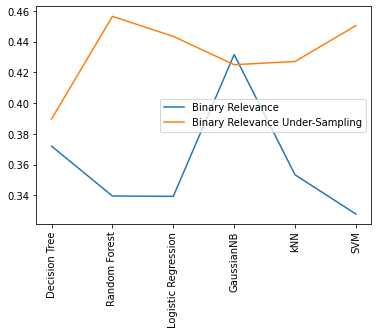

In [ ]:
plt.plot(list(br_clf_f1.keys()), list(br_clf_f1.values()))
plt.plot(list(br_clfus_f1.keys()), list(br_clfus_f1.values()))
plt.xticks(rotation=90)
plt.legend(['Binary Relevance','Binary Relevance Under-Sampling'])

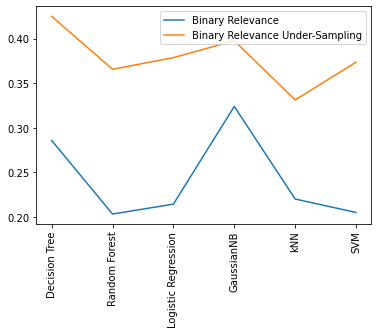

In [ ]:
plt.plot(list(br_clf_ham.keys()), list(br_clf_ham.values()))
plt.plot(list(br_clfus_ham.keys()), list(br_clfus_ham.values()))
plt.xticks(rotation=90)
plt.legend(['Binary Relevance','Binary Relevance Under-Sampling'])

## Task 4: Implement the Classifier Chains Algorithm

In [ ]:
data_path = r'/content/drive/MyDrive/dataset/yeast_data.csv'
label_path = r'/content/drive/MyDrive/dataset/yeast_label.csv'
#X_train, y_train, X_test, y_test = load_csv(data_path, label_path)

In [ ]:
# Read the CSV file
X = pd.read_csv(data_path)


header = []

for i in range(1, X.shape[1]+1):
    header.append('Att'+str(i))
print(header)
X.to_csv("enron_data.csv", header=header, index=False)

X = pd.read_csv('enron_data.csv')

print("Dataset.shape: " + str(X.shape))
y = pd.read_csv(label_path)

header = []

for i in range(1, y.shape[1]+1):
    header.append('Class'+str(i))
print(header)

y.to_csv("enron_label.csv", header=header, index=False)

y = pd.read_csv('enron_label.csv')


print("X.shape: " + str(X.shape))
display(X.head())
print("y.shape: " + str(y.shape))
display(y.head())
print("Descriptive stats:")
X.describe()

['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att25', 'Att26', 'Att27', 'Att28', 'Att29', 'Att30', 'Att31', 'Att32', 'Att33', 'Att34', 'Att35', 'Att36', 'Att37', 'Att38', 'Att39', 'Att40', 'Att41', 'Att42', 'Att43', 'Att44', 'Att45', 'Att46', 'Att47', 'Att48', 'Att49', 'Att50', 'Att51', 'Att52', 'Att53', 'Att54', 'Att55', 'Att56', 'Att57', 'Att58', 'Att59', 'Att60', 'Att61', 'Att62', 'Att63', 'Att64', 'Att65', 'Att66', 'Att67', 'Att68', 'Att69', 'Att70', 'Att71', 'Att72', 'Att73', 'Att74', 'Att75', 'Att76', 'Att77', 'Att78', 'Att79', 'Att80', 'Att81', 'Att82', 'Att83', 'Att84', 'Att85', 'Att86', 'Att87', 'Att88', 'Att89', 'Att90', 'Att91', 'Att92', 'Att93', 'Att94', 'Att95', 'Att96', 'Att97', 'Att98', 'Att99', 'Att100', 'Att101', 'Att102', 'Att103']
Dataset.shape: (2416, 103)
['Class1', 'Class2', 'Class3', 'Class4', 'Class5',

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,-0.055544,...,-0.001198,0.030594,-0.021814,0.010430,-0.013809,-0.009248,-0.027318,-0.014191,0.022783,0.123785
1,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,-0.053756,...,0.195777,0.022294,0.012583,0.002233,-0.002072,-0.010981,0.007615,-0.063378,-0.084181,-0.034402
2,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,-0.123053,...,0.001189,-0.066241,-0.046999,-0.066604,-0.055773,-0.041941,0.051066,0.004976,0.193972,0.131866
3,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,-0.111348,...,-0.035045,-0.080882,0.028468,-0.073576,0.050630,0.084832,-0.019570,-0.021650,-0.068326,-0.091155
4,0.052386,-0.077969,-0.065555,-0.044628,-0.005428,0.120818,0.051850,0.072627,0.107119,0.034214,...,-0.056235,0.187005,-0.053345,0.162630,0.141881,-0.055852,-0.075871,-0.066165,-0.027733,0.069023


y.shape: (2416, 14)


,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,1,1,0,0,0,0,0,0,0,0,1,1,0
2,0,0,1,1,0,0,0,0,0,0,0,1,1,1
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,1,1,0


Descriptive stats:


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,...,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000
mean,0.001135,-0.000494,-0.000283,0.000262,0.001194,0.000525,0.001077,0.000418,0.001065,-0.000027,...,-0.000790,0.000472,-0.000501,0.000683,0.000340,-0.001491,-0.001026,-0.001522,0.000235,0.007556
std,0.097413,0.097864,0.097758,0.096989,0.096915,0.097296,0.097179,0.096823,0.096345,0.096821,...,0.093332,0.096703,0.096226,0.096651,0.096297,0.094388,0.096914,0.094227,0.093142,0.099359
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,-0.455191,-0.283594,-0.279408,-0.226420,-0.225374,-0.501572,-0.236589,-0.267052,-0.194079,-0.237752
25%,-0.053689,-0.058771,-0.057598,-0.057170,-0.058476,-0.060135,-0.058491,-0.062855,-0.063560,-0.065011,...,-0.054157,-0.056452,-0.056422,-0.059432,-0.058030,-0.053600,-0.063331,-0.059546,-0.054079,-0.077199
50%,0.003468,-0.003537,0.002850,-0.000172,0.005518,0.000386,0.006126,0.001423,0.003452,0.002378,...,-0.012933,-0.023597,-0.024312,-0.023023,-0.021937,-0.018219,-0.033615,-0.023481,-0.012015,0.022072
75%,0.057256,0.048045,0.060880,0.054533,0.065772,0.059962,0.068844,0.061512,0.064962,0.063160,...,0.027762,0.034969,0.036229,0.041436,0.035745,0.019640,0.038968,0.025432,0.028014,0.103146
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,0.609175,0.542867,0.547134,0.385928,0.540493,0.569250,0.509963,0.587358,0.700340,0.163431


In [ ]:
# Normalise the data
X = (X-X.min())/(X.max()-X.min())

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

X_train.shape: (1691, 103)
X_test.shape: (725, 103)
y_train.shape: (1691, 14)
y_test.shape: (725, 14)


In [ ]:
class ClassifierChains(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=LogisticRegression(max_iter=20000), order=None):
        self.base_classifier=base_classifier
        self.order = order

    def fit(self, X, y):
        """
        Build a Classifier Chain from the training set (X, y).
        Parameters
        ----------
        X : array-like or sparse matrix, shape = [n_samples, n_features]
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csc_matrix``.
        y : array-like, shape = [n_samples, n_labels] 
            The target values (class labels) as integers or strings.

        """
        
        # check the order parameter
        if self.order is None:
            # default value - natural order for number of labels
            self.order = list(range(y.shape[1]))
        elif self.order == 'random':
            # random order
            self.order = list(range(y.shape[1]))
            random.shuffle(self.order)
        else:
            # order specified
            if(len(self.order)==y.shape[1]):
                # expect order from 1, hence reduce 1 to consider zero indexing
                self.order = [o - 1 for o in self.order]
    
        
        # list of base models for each class
        self.models = [clone(self.base_classifier) for clf in range(y.shape[1])]

        # create a copy of X
        X_joined = X.copy()
       # X_joined.reset_index(drop=True, inplace=True)
        
        # create a new dataframe with X and y-in the order specified
        # if order = [2,4,5,6...] -> X_joined= X, y2, y4, y5...
        for val in self.order:
            X_joined = pd.concat([X_joined, y['Class'+str(val+1)]], axis=1)

        
        # for each ith model, fit the model on X + y0 to yi-1 (in the order specified)
        # if order = [2,4,6,....] fit 1st model on X for y2, fit second model on X+y2 for y4...
        for chain_index, model in enumerate(self.models):
            # select values of the class in order
            y_vals = y.loc[:, 'Class'+str(self.order[chain_index]+1)]
            # pick values for training - X+y upto the current label
            t_X = X_joined.iloc[:, :(X.shape[1]+chain_index)]
            check_X_y(t_X, y_vals)
            # fit the model
            model.fit(t_X, y_vals)


            
    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        
        # dataframe to maintain previous predictions
        pred_chain = pd.DataFrame(columns=['Class'+str(o+1) for o in self.order])
        
        X_copy = X.copy()
        X_joined = X.copy()
        
        # use default indexing
        X_joined.reset_index(drop=True, inplace=True)
        X_copy.reset_index(drop=True, inplace=True)

        i=0
        
        # for each ith model, predict based on X + predictions of all models upto i-1
        # happens in the specified order since models are already fitted according to the order
        for chain_index, model in enumerate(self.models):
            # select previous predictions - all columns upto the current index
            prev_preds = pred_chain.iloc[:, :chain_index]
            # join the previous predictions with X
            X_joined = pd.concat([X_copy, prev_preds], axis=1)
            # predict on the base model
            pred = model.predict(X_joined)
            # add the new prediction to the pred chain
            pred_chain['Class'+str(self.order[i]+1)] = pred
            i+=1

        # re-arrange the columns in natural order to return the predictions
        pred_chain = pred_chain.loc[:, ['Class'+str(j+1) for j in range(0, len(self.order))]]
        # all sklearn implementations return numpy array
        # hence convert the dataframe to numpy array
        return pred_chain.to_numpy()
    
    
    
    # Function to predict probabilities of 1s
    def predict_proba(self, X):
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        
        # dataframe to maintain previous predictions
        pred_chain = pd.DataFrame(columns=['Class'+str(o+1) for o in self.order])
        # dataframe to maintain probabilities of class labels
        pred_probs = pd.DataFrame(columns=['Class'+str(o+1) for o in self.order])
        X_copy = X.copy()
        X_joined = X.copy()
        
        # use default indexing
        X_joined.reset_index(drop=True, inplace=True)
        X_copy.reset_index(drop=True, inplace=True)

        i=0
        
        # for each ith model, predict based on X + predictions of all models upto i-1
        # happens in the specified order since models are already fitted according to the order
        for chain_index, model in enumerate(self.models):
            
            # select previous predictions - all columns upto the current index
            prev_preds = pred_chain.iloc[:, :chain_index]
            # join the previous predictions with X
            X_joined = pd.concat([X_copy, prev_preds], axis=1)
            # predict on the base model
            pred = model.predict(X_joined)
            # predict probabilities
            pred_proba = model.predict_proba(X_joined)
            # add the new prediction to the pred chain
            pred_chain['Class'+str(self.order[i]+1)] = pred
            # save the probabilities of 1 according to label order
            pred_probs['Class'+str(self.order[i]+1)] = [one_prob[1] for one_prob in pred_proba]
            i+=1

        # re-arrange the columns in natural order to return the probabilities
        pred_probs = pred_probs.loc[:, ['Class'+str(j+1) for j in range(0, len(self.order))]]
        # all sklearn implementations return numpy array
        # hence convert the dataframe to numpy array
        return pred_probs.to_numpy()

### Predictions against the Test data

In [ ]:
#cc = ClassifierChains(order=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
cc = ClassifierChains()
# fit
cc.fit(X_train, y_train)

In [ ]:
# predict
cc_pred = cc.predict(X_test)

### Calculate the Accuracy

In [ ]:
print("Accuracy of Classifier Chains: " + str(accuracy_score(y_test, cc_pred)))

Accuracy of Classifier Chains: 0.773


### Experiment with different Base Classifiers - GridSearch

In [ ]:
cv_folds=5

# generate 20 random orders for class labels 
#rand_orders = [list(range(1, y_test.shape[1]+1)) for i in list(range(1, 20))]

#for lst in rand_orders:
 #   random.shuffle(lst)

# make sure natural order is present
#rand_orders.append([1,2,3,4,5,6,7,8,9,10,11,12,13,14])

# Set up the parameter grid to search
param_grid ={'base_classifier': [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
                                 RandomForestClassifier(criterion='entropy'),
                                 LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(n_neighbors=4), SVC()],
            }#'order': rand_orders}

# Perform the search
tuned_model = GridSearchCV(ClassifierChains(), \
                            param_grid, scoring=make_scorer(accuracy_score), verbose = 2, n_jobs = -1, cv=cv_folds)
tuned_model.fit(X_train, y_train)

# Print details
print("Best Parameters Found: ")
display(tuned_model.best_params_)
display(tuned_model.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters Found: 


{'base_classifier': RandomForestClassifier(criterion='entropy')}

0.814264

In [ ]:
# store the best parameters
best = tuned_model.best_params_

### Evaluate the best model against the Test Data

In [ ]:
#cc = ClassifierChains(base_classifier=best['base_classifier'], order=best['order'])
cc = ClassifierChains(base_classifier=best['base_classifier'])
cc.fit(X_train, y_train)

In [ ]:
cc_pred = cc.predict(X_test)

In [ ]:
print("Accuracy of Classifier Chains - Best Model: " + str(accuracy_score(y_test, cc_pred)))

Accuracy of Classifier Chains - Best Model: 0.78926


## Task 5: Evaluate the Performance of the Classifier Chains Algorithm

### Accuracy and F1 Scores of Classifier Chains

In [ ]:
# list of base models
base_models = [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
               RandomForestClassifier(criterion='entropy'),
               LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()]
base_model_names = ["Decision Tree", "Random Forest", "Logistic Regression", "GaussianNB", "kNN", "SVM"]

cc_accuracies = dict()
cc_f1 = dict()
cc_ham = dict()

i=0
for clf in base_models:
    #cc = ClassifierChains(clf, order=best['order'])
    cc = ClassifierChains(clf)
    cc.fit(X_train, y_train)
    cc_pred = cc.predict(X_test)
    # accuracy score
    accuracy = accuracy_score(y_test, cc_pred)
    cc_accuracies[base_model_names[i]] = accuracy
    # F1 score
    cc_f1_score = metrics.f1_score(y_test, pd.DataFrame(cc_pred), average='macro')
    cc_f1[base_model_names[i]] = cc_f1_score
    # Hamming Score
    hamming = hamming_loss(y_test, cc_pred)
    cc_ham[base_model_names[i]] = hamming
    i+=1

print("====================Classifier Chains Accuracy====================")
display(cc_accuracies)
print("===================Classifier Chains F1 Scores====================")
display(cc_f1)
print("===================Classifier Chains Hamming Loss====================")
display(cc_ham)

====================Classifier Chains Accuracy====================


{'Decision Tree': 0.72355,
 'Random Forest': 0.7931,
 'Logistic Regression': 0.773,
 'GaussianNB': 0.66069,
 'kNN': 0.77567,
 'SVM': 0.78453}

===================Classifier Chains F1 Scores====================


{'Decision Tree': 0.3874364422201807,
 'Random Forest': 0.36661888724519287,
 'Logistic Regression': 0.37746896974583016,
 'GaussianNB': 0.41998209248639107,
 'kNN': 0.4322904271162943,
 'SVM': 0.3603761599984326}

===================Classifier Chains Hamming Loss====================


{'Decision Tree': 0.2764532019704434,
 'Random Forest': 0.20689655172413793,
 'Logistic Regression': 0.22699507389162563,
 'GaussianNB': 0.3393103448275862,
 'kNN': 0.22433497536945812,
 'SVM': 0.2154679802955665}

### Comparison with Binary Relevance Approaches

#### Accuracy Scores

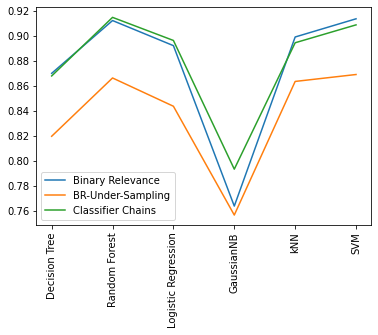

In [ ]:
plt.plot(list(br_clf_accuracies.keys()), list(br_clf_accuracies.values()))
plt.plot(list(br_clfus_accuracies.keys()), list(br_clfus_accuracies.values()))
plt.plot(list(cc_accuracies.keys()), list(cc_accuracies.values()))
plt.xticks(rotation=90)
plt.legend(['Binary Relevance','BR-Under-Sampling', 'Classifier Chains'])

#### F1 Scores

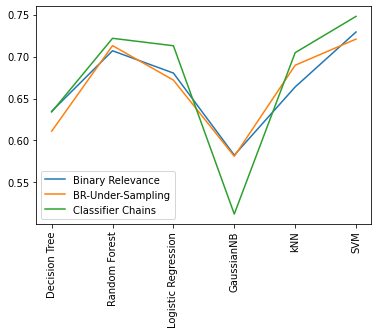

In [ ]:
plt.plot(list(br_clf_f1.keys()), list(br_clf_f1.values()))
plt.plot(list(br_clfus_f1.keys()), list(br_clfus_f1.values()))
plt.plot(list(cc_f1.keys()), list(cc_f1.values()))
plt.xticks(rotation=90)
plt.legend(['Binary Relevance','BR-Under-Sampling', 'Classifier Chains'])

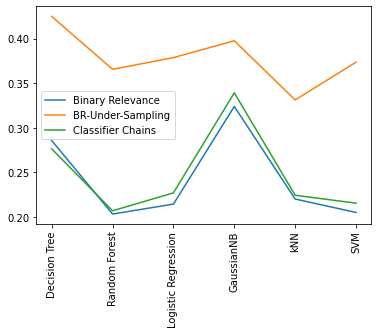

In [ ]:
plt.plot(list(br_clf_ham.keys()), list(br_clf_ham.values()))
plt.plot(list(br_clfus_ham.keys()), list(br_clfus_ham.values()))
plt.plot(list(cc_ham.keys()), list(cc_ham.values()))
plt.xticks(rotation=90)
plt.legend(['Binary Relevance','BR-Under-Sampling', 'Classifier Chains'])

## Task 6: Reflect on the Performance of the Different Models Evaluated

Consider **BR=Binary Relevance Classifier, BRUS=Binary Relevance Classifier with Under Sampling, CC=Classifier Chains.**

**From the above experiment we can conclude that:**

* BR works much better than BRUS. This is because with undersampling, relevant training samples may be lost which affect the accuracy.
* BRUS gives better F1 scores for all the base models as compared to BR. Lower F1 score is an indication that the data is highly biased which means high precision and low recall. So when the data gets more balanced after undersampling, we achieve better F1 scores.
* CC works better than BR and BRUS because it takes label dependency into consideration while making predictions. BR on the other hand fits and predicts independently of other labels. To my surprise, in this experiment we can obseve that CC outperforms BR only in case of RandomForest as the base model. 
* The performance of CC depends on the label order as while making current predictions, we consider the results and labels of previous predictions. To experiment with label ordering, random 20 label orders were used in grid search. To my observation, the results accross different runs are inconsistent pertaining to label orders.(refer the above plots)
* In terms of complexity, BR is simple and faster as compared to CC. In terms of performance, CC has better performance than BR due to reasons mentioned above.
* While dealing with Yeast Dataset, CC works slightly better than BR which is a surprise. So, while dealing with Yeast Dataset, we can use BR as an adequate model if complexity and speed is a concern.

# References:

[1] Read, J., Pfahringer, B., Holmes, G. and Frank, E. (2011). Classifier chains for multi-label classification. Machine Learning, [online] 85(3), pp.333-359. Available at: https://link.springer.com/content/pdf/10.1007/s10994-011-5256-5.pdf.

[2] A Literature Survey on Algorithms for Multi-label Learning by Mohammad S Sorower. Available at: https://pdfs.semanticscholar.org/6b56/91db1e3a79af5e3c136d2dd322016a687a0b.pdf

In [ ]:
!pip install mllearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=5edfb22d597781706ad5a0aca460991a5339be5f634996b940e12be47c7dc080
  Stored in directory: /root/.cache/pip/wheels/a2/de/68/bf3972de3ecb31e32bef59a7f4c75f0687a3674c476b347c14
Successfully built liac-arff


In [ ]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 4.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
from mllearn.problem_transform import BinaryRelevance
from mllearn.problem_transform import CalibratedLabelRanking
from mllearn.problem_transform import ClassifierChain
from mllearn.problem_transform import RandomKLabelsets
from mllearn.alg_adapt import MLKNN
from skmultilearn.adapt import MLkNN
from mllearn.alg_adapt import MLDecisionTree
from mllearn.metrics import hamming_loss
from mllearn.metrics import subset_acc
#from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from mllearn.metrics import accuracy
from mllearn.metrics import precision
from mllearn.metrics import recall
from mllearn.metrics import F_beta

from sklearn.dummy import DummyClassifier

from sklearn.metrics import zero_one_loss
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

import arff
import pandas as pd
from sklearn.preprocessing import StandardScaler

from IPython.display import display, HTML, Image

import matplotlib.pyplot as plt
import copy
import random

from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer


# to avoid future warnings for sklearn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def accuracy_score(y_test, y_pred):
    # y_pred is a numpy array, y_test is a dataframe
    # to compare the two, convert to a single type
    #y_test = y_test.to_numpy()
    
    # shape of test and preds must be equal
    assert y_test.shape == y_pred.shape
    i=0
    # list of scores for each training sample
    scores = []
    
    # for each test sample
    while i < len(y_test):
        count=0
        # count the number of matches in the sample
        # y_test[i] -> row values in test set (true values)
        # y_pred[i] -> row values in predictions set (predicted values)
        for p, q in zip(y_test[i], y_pred[i]):
            if p == q:
                count += 1

        # accuracy score for the sample = no. of correctly predicted labels/total no. of labels
        scores.append(count / y_pred.shape[1])
        i+=1 

    # final accuracy = avg. accuracy over all test samples =
    # sum of the accuracy of all training samples/no. of training samples
    return round((sum(scores)/len(y_test)), 5)

In [ ]:
X_train, y_train, X_test, y_test = X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1691, 103)
(1691, 14)
(725, 103)
(725, 14)


In [ ]:
#  MLLearn Library

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

#dummy_clf.fit(X_train, y_train)
predictions = dummy_clf.predict(X_test)
print(predictions.shape)
print('The hamming_loss of Dummy Classifier is %f' % hamming_loss(y_test, predictions))
print('The subset_acc of Dummy Classifier is %f' % subset_acc(y_test, predictions))
print('zero-one-loss of Dummy Classifier is %f'% zero_one_loss(y_test, predictions))
print('The F_beta Result is %f' % F_beta(y_test, predictions))
print('The F1 Result is %f' % f1_score(y_test, predictions, average="macro"))


classif = BinaryRelevance()
classif.fit(X_train, y_train)
predictions = classif.predict(X_test)
print('The hamming_loss of BinaryRelevance is %f' % hamming_loss(y_test, predictions))
print('The subset_acc of BinaryRelevance is %f' % subset_acc(y_test, predictions))
print('zero-one-loss of BinaryRelevance is %f'% zero_one_loss(y_test, predictions))
print('The F_beta Result is %f' % F_beta(y_test, predictions))
print('The F1 Result is %f' % f1_score(y_test, predictions, average="macro"))

classif = ClassifierChain()
classif.fit(X_train, y_train)
predictions = classif.predict(X_test)
print('The hamming_loss of Classifier Chain is %f' % hamming_loss(y_test, predictions))
print('The subset_acc of Classifier Chain is %f' % subset_acc(y_test, predictions))
print('zero-one-loss of ClassifierChain is %f'% zero_one_loss(y_test, predictions))
print('The F_beta Result is %f' % F_beta(y_test, predictions))
print('The F1 Result is %f' % f1_score(y_test, predictions, average="macro"))

classif = CalibratedLabelRanking()
classif.fit(X_train, y_train)
predictions = classif.predict(X_test)
print('The hamming_loss of CalibratedLabelRanking is %f' % hamming_loss(y_test, predictions))
print('The subset_acc of CalibratedLabelRanking is %f' % subset_acc(y_test, predictions))
print('zero-one-loss of CalibratedLabelRanking is %f'% zero_one_loss(y_test, predictions))
print('The F_beta Result is %f' % F_beta(y_test, predictions))
print('The F1 Result is %f' % f1_score(y_test, predictions, average="macro"))

classif = RandomKLabelsets()
classif.fit(X_train, y_train)
predictions = classif.predict(X_test)
print('The hamming_loss of Random K-Labelsets is %f' % hamming_loss(y_test, predictions))
print('The subset_acc of Random K-Labelsets is %f' % subset_acc(y_test, predictions))
print('zero-one-loss of RandomKLabelsets is %f'% zero_one_loss(y_test, predictions))
print('The F_beta Result is %f' % F_beta(y_test, predictions))
print('The F1 Result is %f' % f1_score(y_test, predictions, average="macro"))

(725, 14)
The hamming_loss of Dummy Classifier is 0.238818
The subset_acc of Dummy Classifier is 0.012414
zero-one-loss of Dummy Classifier is 0.987586
The F_beta Result is 0.438496
The F1 Result is 0.119067
The hamming_loss of BinaryRelevance is 0.205025
The subset_acc of BinaryRelevance is 0.143448
zero-one-loss of BinaryRelevance is 0.856552
The F_beta Result is 0.616597
The F1 Result is 0.327877
The hamming_loss of Classifier Chain is 0.215468
The subset_acc of Classifier Chain is 0.188966
zero-one-loss of ClassifierChain is 0.811034
The F_beta Result is 0.600635
The F1 Result is 0.360376
The hamming_loss of CalibratedLabelRanking is 0.204631
The subset_acc of CalibratedLabelRanking is 0.144828
zero-one-loss of CalibratedLabelRanking is 0.855172
The F_beta Result is 0.614439
The F1 Result is 0.326719
The hamming_loss of Random K-Labelsets is 0.203842
The subset_acc of Random K-Labelsets is 0.162759
zero-one-loss of RandomKLabelsets is 0.837241
The F_beta Result is 0.620017
The F1 R

In [ ]:

base_models = [BinaryRelevance(), ClassifierChain(), CalibratedLabelRanking(), RandomKLabelsets()]
base_model_names = ["Binary Relevance", "Classifier Chain", 'Calibrated Label Ranking', 'Random K-Labelsets']

cc_accuracies = dict()
cc_f1 = dict()
cc_hamming = dict()

i=0
for cc in base_models:

    cc.fit(X_train, y_train)
    cc_pred = cc.predict(X_test)
    # accuracy score
    accuracy = accuracy_score(y_test, cc_pred)
    cc_accuracies[base_model_names[i]] = accuracy
    # F1 score
    cc_f1_score = metrics.f1_score(y_test, pd.DataFrame(cc_pred), average='macro')
    cc_f1[base_model_names[i]] = cc_f1_score
    # Hamming
    hamming = hamming_loss(y_test, cc_pred)
    cc_hamming[base_model_names[i]] = hamming
    i+=1

print("====================MLLearn Accuracy====================")
display(cc_accuracies)
print("===================MLLearn F1 Scores====================")
display(cc_f1)
print("====================MLLearn Hamming Loss====================")
display(cc_hamming)

====================MLLearn Accuracy====================


{'Binary Relevance': 0.79498,
 'Classifier Chain': 0.78453,
 'Calibrated Label Ranking': 0.79537,
 'Random K-Labelsets': 0.79685}

===================MLLearn F1 Scores====================


{'Binary Relevance': 0.32787742663955644,
 'Classifier Chain': 0.3603761599984326,
 'Calibrated Label Ranking': 0.3267194329097088,
 'Random K-Labelsets': 0.3405642892839444}

====================MLLearn Hamming Loss====================


{'Binary Relevance': 0.20502463054187192,
 'Classifier Chain': 0.2154679802955665,
 'Calibrated Label Ranking': 0.20463054187192117,
 'Random K-Labelsets': 0.20315270935960592}

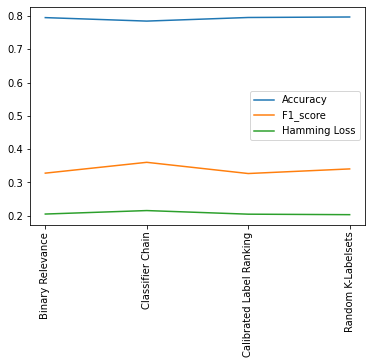

In [ ]:
plt.plot(list(cc_accuracies.keys()), list(cc_accuracies.values()))
plt.plot(list(cc_f1.keys()), list(cc_f1.values()))
plt.plot(list(cc_hamming.keys()), list(cc_hamming.values()))
plt.xticks(rotation=90)
plt.legend(['Accuracy', 'F1_score', 'Hamming Loss', ])

In [ ]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model)
rfe = rfe.fit(X_train, y_train[:,:1])
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

print('Xshape:', X_train.shape)

[False  True  True  True False False  True  True False  True False  True
  True False False False False False False  True False False  True False
  True  True False  True False  True  True  True  True  True False False
 False  True  True  True  True False  True  True  True False  True  True
  True False  True  True False  True  True False  True False  True  True
  True False False  True  True False  True False False False False False
  True  True  True False  True False False  True False False False  True
 False False  True False  True False  True  True False False False False
 False False False False False False False False  True False False  True
  True  True False False False False False  True False  True False  True
  True  True False  True False  True False False False False  True False
 False False False  True  True  True  True False False False  True  True
  True  True  True  True False  True  True  True  True  True False  True
 False  True  True  True False False  True False Fa

In [ ]:
# report which features were selected by RFE
#from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=50)
# fit RFE
rfe.fit(X_train, y_train[:,:1])
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 245.000
Column: 1, Selected False, Rank: 244.000
Column: 2, Selected False, Rank: 243.000
Column: 3, Selected False, Rank: 242.000
Column: 4, Selected False, Rank: 241.000
Column: 5, Selected False, Rank: 240.000
Column: 6, Selected False, Rank: 235.000
Column: 7, Selected False, Rank: 234.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 21.000
Column: 10, Selected False, Rank: 20.000
Column: 11, Selected False, Rank: 19.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected False, Rank: 17.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 18.000
Column: 16, Selected False, Rank: 13.000
Column: 17, Selected False, Rank: 28.000
Column: 18, Selected False, Rank: 26.000
Column: 19, Selected False, Rank: 35.000
Column: 20, Selected False, Rank: 11.000
Column: 21, Selected False, Rank: 22.000
Column: 22, Selected False, Rank: 34.000
Column: 23, Selected False, Rank: 46.000
Column: 24, Selected Fal

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

sec_col = []

for i in range(0,14):

    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=100)
    # fit RFE
    rfe.fit(X_train, y_train[:,i:i+1])

    selected_columns = []
    # summarize all features
    for j in range(X_train.shape[1]):
        #print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
        if rfe.support_[j]:
            selected_columns.append(j)
    #print(selected_columns)
    sec_col.append(selected_columns)
print(sec_col)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55

In [ ]:
def flatten_nested_lists(matrix):
    l = []
    for row in matrix:
        for x in row:
            l.append(x)
        return l

flat_list = flatten_nested_lists(sec_col)
print(len(flat_list))
print(flat_list)

100
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]


In [ ]:
X_new = np.zeros((X_train.shape[0], 100))
X_new_test = np.zeros((X_test.shape[0], 100))
print(X_new.shape)
for i, v in enumerate(flat_list):
    X_new[:,i] = X_train[:, v]
    X_new_test[:, i] = X_test[:, v]

(1691, 100)


In [ ]:
X_train = X_new
X_test = X_new_test

In [ ]:
def accuracy_score(y_test, y_pred):
    # y_pred is a numpy array, y_test is a dataframe
    # to compare the two, convert to a single type
    #y_test = y_test.to_numpy()
    
    # shape of test and preds must be equal
    assert y_test.shape == y_pred.shape
    i=0
    # list of scores for each training sample
    scores = []
    
    # for each test sample
    while i < len(y_test):
        count=0
        # count the number of matches in the sample
        # y_test[i] -> row values in test set (true values)
        # y_pred[i] -> row values in predictions set (predicted values)
        for p, q in zip(y_test[i], y_pred[i]):
            if p == q:
                count += 1

        # accuracy score for the sample = no. of correctly predicted labels/total no. of labels
        scores.append(count / y_pred.shape[1])
        i+=1 

    # final accuracy = avg. accuracy over all test samples =
    # sum of the accuracy of all training samples/no. of training samples
    return round((sum(scores)/len(y_test)), 5)

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

dummy_clf.fit(X_train, y_train)
predictions = dummy_clf.predict(X_test)
print('The hamming_loss of Dummy Classifier is %f' % hamming_loss(y_test, predictions))
print('The subset_acc of Dummy Classifier is %f' % subset_acc(y_test, predictions))
print('zero-one-loss of Dummy Classifier is %f'% zero_one_loss(y_test, predictions))
print('The F_beta Result is %f' % F_beta(y_test, predictions))
print('acc-score is %f ' % accuracy_score(y_test, predictions))
print('The F1 Result is %f' % f1_score(y_test, predictions, average="macro"))

classif = BinaryRelevance()
classif.fit(X_train, y_train)
predictions = classif.predict(X_test)
print('The hamming_loss of BR is %f' % hamming_loss(y_test, predictions))
print('The subset_acc of BR is %f' % subset_acc(y_test, predictions))
print('zero-one-loss of BR is %f'% zero_one_loss(y_test, predictions))
print('The F_beta Result of BR is %f' % F_beta(y_test, predictions))
print('acc-score of BR is %f ' % accuracy_score(y_test, predictions))
print('The F1 Result BR is %f' % f1_score(y_test, predictions, average="macro"))


classif = ClassifierChain()
classif.fit(X_train, y_train)
predictions = classif.predict(X_test)
print('The hamming_loss of CC is %f' % hamming_loss(y_test, predictions))
print('The subset_acc of Classifier Chain is %f' % subset_acc(y_test, predictions))
print('zero-one-loss of Classifier Chain is %f'% zero_one_loss(y_test, predictions))
print('The F_beta Result of Classifier Chain is %f' % F_beta(y_test, predictions))
print('acc-score of Classifier Chain is %f ' % accuracy_score(y_test, predictions))
print('The F1 Result is %f' % f1_score(y_test, predictions, average="macro"))

classif = CalibratedLabelRanking()
classif.fit(X_train, y_train)
predictions = classif.predict(X_test)
print('The hamming_loss of CalibratedLabelRanking is %f' % hamming_loss(y_test, predictions))
print('The subset_acc of CalibratedLabelRanking is %f' % subset_acc(y_test, predictions))
print('zero-one-loss of CalibratedLabelRanking is %f'% zero_one_loss(y_test, predictions))
print('The F_beta Result of CalibratedLabelRanking is %f' % F_beta(y_test, predictions))
print('acc-score of CalibratedLabelRanking is %f ' % accuracy_score(y_test, predictions))
print('The F1 Result is %f' % f1_score(y_test, predictions, average="macro"))

classif = RandomKLabelsets()
classif.fit(X_train, y_train)
predictions = classif.predict(X_test)
print('The hamming_loss of Random K-Labelsets is %f' % hamming_loss(y_test, predictions))
print('The subset_acc of Random K-Labelsets is %f' % subset_acc(y_test, predictions))
print('zero-one-loss of RandomKLabelsets is %f'% zero_one_loss(y_test, predictions))
print('The F_beta Result of RandomKLabelsets is %f' % F_beta(y_test, predictions))
print('acc-score of RandomKLabelsets is %f ' % accuracy_score(y_test, predictions))
print('The F1 Result is %f' % f1_score(y_test, predictions, average="macro"))


The hamming_loss of Dummy Classifier is 0.238818
The subset_acc of Dummy Classifier is 0.012414
zero-one-loss of Dummy Classifier is 0.987586
The F_beta Result is 0.438496
acc-score is 0.761180 
The F1 Result is 0.119067
The hamming_loss of CalibratedLabelRanking is 0.214286
The subset_acc of CalibratedLabelRanking is 0.188966
zero-one-loss of CalibratedLabelRanking is 0.811034
The F_beta Result of CalibratedLabelRanking is 0.602623
acc-score of CalibratedLabelRanking is 0.785710 
The F1 Result is 0.357900
The hamming_loss of CalibratedLabelRanking is 0.205517
The subset_acc of CalibratedLabelRanking is 0.143448
zero-one-loss of CalibratedLabelRanking is 0.856552
The F_beta Result of CalibratedLabelRanking is 0.612894
acc-score of CalibratedLabelRanking is 0.794480 
The F1 Result is 0.324440
The hamming_loss of Random K-Labelsets is 0.205419
The subset_acc of Random K-Labelsets is 0.186207
zero-one-loss of RandomKLabelsets is 0.813793
The F_beta Result of RandomKLabelsets is 0.626598
a

In [ ]:
# Read the CSV file
X = pd.read_csv(data_path)


header = []

for i in range(1, X.shape[1]+1):
    header.append('Att'+str(i))
print(header)
X.to_csv("enron_data.csv", header=header, index=False)

X = pd.read_csv('enron_data.csv')

print("Dataset.shape: " + str(X.shape))
y = pd.read_csv(label_path)

header = []

for i in range(1, y.shape[1]+1):
    header.append('Class'+str(i))
print(header)

y.to_csv("enron_label.csv", header=header, index=False)

y = pd.read_csv('enron_label.csv')


print("X.shape: " + str(X.shape))
display(X.head())
print("y.shape: " + str(y.shape))
display(y.head())
print("Descriptive stats:")
X.describe()

# Normalise the data
X = (X-X.min())/(X.max()-X.min())

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

NameError: ignored

In [ ]:
X_train, y_train, X_test, y_test = X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()

In [ ]:
# list of base models
base_models = [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
               RandomForestClassifier(criterion='entropy'),
               LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()]
base_model_names = ["Decision Tree", "Random Forest", "Logistic Regression", "GaussianNB", "kNN", "SVM"]

cc_accuracies = dict()
cc_f1 = dict()
cc_hamming = dict()

i=0
for clf in base_models:
    
    cc = RandomKLabelsets(clf)
    cc.fit(X_train, y_train)
    cc_pred = cc.predict(X_test)
    # accuracy score
    accuracy = accuracy_score(y_test, cc_pred)
    cc_accuracies[base_model_names[i]] = accuracy
    # F1 score
    cc_f1_score = metrics.f1_score(y_test, pd.DataFrame(cc_pred), average='macro')
    cc_f1[base_model_names[i]] = cc_f1_score
    # hamming loss
    hamming = hamming_loss(y_test, cc_pred)
    cc_hamming[base_model_names[i]] = hamming

    i+=1

print("====================RandomKLabelsets Accuracy====================")
display(cc_accuracies)
print("===================RandomKLabelsets F1 Scores====================")
display(cc_f1)
print("===================RandomKLabelsets Hamming Loss Scores====================")
display(cc_hamming)

====================RandomKLabelsets Accuracy====================


{'Decision Tree': 0.76256,
 'Random Forest': 0.79389,
 'Logistic Regression': 0.78532,
 'GaussianNB': 0.71113,
 'kNN': 0.77734,
 'SVM': 0.79773}

===================RandomKLabelsets F1 Scores====================


{'Decision Tree': 0.3227284172701236,
 'Random Forest': 0.35400214742276226,
 'Logistic Regression': 0.3527910618504751,
 'GaussianNB': 0.4387325555622241,
 'kNN': 0.3802160697698428,
 'SVM': 0.34668815834432926}

===================RandomKLabelsets Hamming Loss Scores====================


{'Decision Tree': 0.2374384236453202,
 'Random Forest': 0.20610837438423646,
 'Logistic Regression': 0.21467980295566502,
 'GaussianNB': 0.28886699507389163,
 'kNN': 0.22266009852216748,
 'SVM': 0.20226600985221674}

In [ ]:
print('max value with key:', max(zip(cc_accuracies.values(), cc_accuracies.keys())))

max value with key: (0.79773, 'SVM')


In [ ]:
# Gini as entropy
base_models = [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=2) ,
               RandomForestClassifier(criterion='entropy'),
               LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()]
base_model_names = ["Decision Tree", "Decision Tree Gini" ,"Random Forest", "Logistic Regression", "GaussianNB", "kNN", "SVM"]

cc_accuracies = dict()
cc_f1 = dict()
cc_hamming = dict()

i=0
for clf in base_models:
    #cc = ClassifierChains(clf, order=best['order'])
    cc = RandomKLabelsets(clf)
    cc.fit(X_train, y_train)
    cc_pred = cc.predict(X_test)
    # accuracy score
    accuracy = accuracy_score(y_test, cc_pred)
    cc_accuracies[base_model_names[i]] = accuracy
    # F1 score
    cc_f1_score = metrics.f1_score(y_test, pd.DataFrame(cc_pred), average='macro')
    cc_f1[base_model_names[i]] = cc_f1_score
    # hamming
    hamming = hamming_loss(y_test, cc_pred)
    cc_hamming[base_model_names[i]] = hamming
    i+=1

print("====================RandomKLabelsets Accuracy====================")
display(cc_accuracies)
print("===================RandomKLabelsets F1 Scores====================")
display(cc_f1)

====================RandomKLabelsets Accuracy====================


{'Decision Tree': 0.76768,
 'Decision Tree Gini': 0.76975,
 'Random Forest': 0.79842,
 'Logistic Regression': 0.78631,
 'GaussianNB': 0.69941,
 'kNN': 0.77665,
 'SVM': 0.79596}

===================RandomKLabelsets F1 Scores====================


{'Decision Tree': 0.3217318779311745,
 'Decision Tree Gini': 0.33096494570826307,
 'Random Forest': 0.3536695760134327,
 'Logistic Regression': 0.361919641204045,
 'GaussianNB': 0.437434681516474,
 'kNN': 0.38448270272221385,
 'SVM': 0.33970914743358216}

In [ ]:
# list of base models
base_models = [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
               RandomForestClassifier(criterion='entropy'),
               LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()]
base_model_names = ["Decision Tree", "Random Forest", "Logistic Regression", "GaussianNB", "kNN", "SVM"]

cc_accuracies = dict()
cc_f1 = dict()
cc_hamming = dict()

i=0
for clf in base_models:

    cc = CalibratedLabelRanking(clf)
    cc.fit(X_train, y_train)
    cc_pred = cc.predict(X_test)
    # accuracy score
    accuracy = accuracy_score(y_test, cc_pred)
    cc_accuracies[base_model_names[i]] = accuracy
    # F1 score
    cc_f1_score = metrics.f1_score(y_test, pd.DataFrame(cc_pred), average='macro')
    cc_f1[base_model_names[i]] = cc_f1_score
    # Hamming
    hamming = hamming_loss(y_test, cc_pred)
    cc_hamming[base_model_names[i]] = hamming
    i+=1

print("====================CLR Accuracy====================")
display(cc_accuracies)
print("===================CLR F1 Scores====================")
display(cc_f1)
print("====================CLR Hamming Loss====================")
display(cc_hamming)

====================CLR Accuracy====================


{'Decision Tree': 0.76158,
 'Random Forest': 0.79468,
 'Logistic Regression': 0.78532,
 'GaussianNB': 0.68867,
 'kNN': 0.78631,
 'SVM': 0.79537}

===================CLR F1 Scores====================


{'Decision Tree': 0.3494104664458881,
 'Random Forest': 0.3283483614712321,
 'Logistic Regression': 0.3337487074214078,
 'GaussianNB': 0.4319639759881852,
 'kNN': 0.40129635355831345,
 'SVM': 0.3267194329097088}

====================CLR Hamming Loss====================


{'Decision Tree': 0.23842364532019705,
 'Random Forest': 0.20532019704433496,
 'Logistic Regression': 0.21467980295566502,
 'GaussianNB': 0.31133004926108376,
 'kNN': 0.21369458128078817,
 'SVM': 0.20463054187192117}

#Sklearn multilabel classification package 

In [ ]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

parameters = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.7, 1.0],
    },
    {
        'classifier': [SVC()],
        'classifier__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'classifier__C': [0.2, 0.5, 0.7, 0.8, 1],
        'classifier__gamma': ['scale', 'auto']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [10, 20, 30, 40, 50, 80, 150, 200],
        'classifier__max_features': ['sqrt', 'log'],
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__criterion': ['gini', 'entropy', 'log_loss'],
        
    }, 
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'classifier__metric': ['minkowski'],
        'classifier__n_neighbors': [3, 4, 5, 8, 10],
        'classifier__weights': ['uniform', 'distance'],
     
    },
]

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


clf = GridSearchCV(ClassifierChain(), parameters, scoring='accuracy')
clf.fit(X_train, y_train)

print (clf.best_params_, clf.best_score_)

{'classifier': KNeighborsClassifier(n_neighbors=8, weights='distance'), 'classifier__algorithm': 'auto', 'classifier__metric': 'minkowski', 'classifier__n_neighbors': 8, 'classifier__weights': 'distance'} 0.23954022988505747


In [ ]:
predictions = clf.predict(X_test)
print
print('zero-one-loss is %f'% zero_one_loss(y_test, predictions))
print('hamming-loss is %f'% metrics.hamming_loss(y_test, predictions))
print('Accuracy Score  is %f' % metrics.accuracy_score(y_test, predictions))
print('F1_score is %f' % f1_score(y_test, predictions, average='macro'))
print('The F_beta Result of RandomKLabelsets is %f' % metrics.fbeta_score(y_test, predictions, average='macro', beta=0.5))

zero-one-loss is 0.734440
hamming-loss is 0.209544
Accuracy Score  is 0.265560
F1_score is 0.438836
The F_beta Result of RandomKLabelsets is 0.451170


In [ ]:
from skmultilearn.problem_transform import BinaryRelevance

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

parameters = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.7, 1.0],
    },
    {
        'classifier': [SVC()],
        'classifier__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'classifier__C': [0.2, 0.5, 0.7, 0.8, 1],
        'classifier__gamma': ['scale', 'auto']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [10, 20, 30, 40, 50, 80, 150, 200],
        'classifier__max_features': ['sqrt', 'log'],
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    }, 
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'classifier__metric': ['minkowski'],
        'classifier__n_neighbors': [3, 4, 5, 8, 10],
        'classifier__weights': ['uniform', 'distance'],
     
    },
]

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
print(type(X))
print(type(y))
for train_index, test_index in kf.split(X.to_numpy(), y.to_numpy()):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

clf = GridSearchCV(BinaryRelevance(), parameters, scoring='accuracy')
clf.fit(X_train, y_train)

print (clf.best_params_, clf.best_score_)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
{'classifier': MultinomialNB(alpha=0.7), 'classifier__alpha': 0.7} 0.013793103448275862


In [ ]:
import sklearn.metrics as metrics

#metrics.hamming_loss(y_test, prediction)
predictions = clf.predict(X_test)
print('zero-one-loss is %f'% zero_one_loss(y_test.to_numpy(), predictions))
#print(predictions)
print('hamming-loss is %f'% metrics.hamming_loss(y_test, predictions))
#print('Accuracy Score  is %f' % accuracy_score(y_test, predictions))
print('F1_score is %f' % f1_score(y_test, predictions, average='macro'))
#print('The F_beta Result of RandomKLabelsets is %f' % F_beta(y_test.to_numpy(), predictions))

zero-one-loss is 0.983402
hamming-loss is 0.225252
F1_score is 0.137457


In [ ]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

parameters = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.7, 1.0],
    },
    {
        'classifier': [SVC()],
        'classifier__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'classifier__C': [0.2, 0.5, 0.7, 0.8, 1],
        'classifier__gamma': ['scale', 'auto']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [10, 20, 30, 40, 50, 80, 150, 200],
        'classifier__max_features': ['sqrt', 'log'],
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    }, 
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'classifier__metric': ['minkowski'],
        'classifier__n_neighbors': [3, 4, 5, 8, 10],
        'classifier__weights': ['uniform', 'distance'],
     
    },
]

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
print(type(X))
print(type(y))
for train_index, test_index in kf.split(X.to_numpy(), y.to_numpy()):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

clf = GridSearchCV(LabelPowerset(), parameters, scoring='accuracy')
clf.fit(X_train, y_train)

print (clf.best_params_, clf.best_score_)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
{'classifier': RandomForestClassifier(max_features='sqrt', n_estimators=200), 'classifier__criterion': 'gini', 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200} 0.6541958897840593


In [ ]:
from skmultilearn.problem_transform import LabelPowerset
clf = LabelPowerset(classifier = RandomForestClassifier(n_estimators=100, criterion="gini", max_features="sqrt"))
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('zero-one-loss is %f'% zero_one_loss(y_test, predictions))
print('hamming-loss is %f'% metrics.hamming_loss(y_test, predictions))
print('Accuracy Score  is %f' % metrics.accuracy_score(y_test, predictions))
print('F1_score is %f' % f1_score(y_test, predictions, average='macro'))
print('The F_beta Result of RandomKLabelsets is %f' % metrics.fbeta_score(y_test, predictions, average='macro', beta=0.5))

zero-one-loss is 0.684647
hamming-loss is 0.179312
Accuracy Score  is 0.315353
F1_score is 0.436128
The F_beta Result of RandomKLabelsets is 0.483287


In [ ]:
predictions = clf.predict(X_test)

print('zero-one-loss is %f'% zero_one_loss(y_test, predictions))
print('hamming-loss is %f'% hamming_loss(y_test, predictions))
print('Accuracy Score  is %f' % accuracy_score(y_test, predictions))
print('F1_score is %f' % f1_score(y_test, predictions, average='macro'))
print('The F_beta Result of RandomKLabelsets is %f' % F_beta(y_test, predictions))

In [ ]:
ClassifierChain(classifier=SVC(), require_dense=[True, True]).get_params().keys()

dict_keys(['classifier', 'classifier__C', 'classifier__break_ties', 'classifier__cache_size', 'classifier__class_weight', 'classifier__coef0', 'classifier__decision_function_shape', 'classifier__degree', 'classifier__gamma', 'classifier__kernel', 'classifier__max_iter', 'classifier__probability', 'classifier__random_state', 'classifier__shrinking', 'classifier__tol', 'classifier__verbose', 'require_dense', 'order'])

In [ ]:
ClassifierChain(classifier=DecisionTreeClassifier(), require_dense=[True, True]).get_params().keys()

dict_keys(['classifier', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__min_impurity_decrease', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__random_state', 'classifier__splitter', 'require_dense', 'order'])

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
ClassifierChain(classifier=GaussianNB(), require_dense=[True, True]).get_params().keys()

dict_keys(['classifier', 'classifier__priors', 'classifier__var_smoothing', 'require_dense', 'order'])

In [ ]:
ClassifierChain(classifier=KNeighborsClassifier(), require_dense=[True, True]).get_params().keys()

dict_keys(['classifier', 'classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__metric_params', 'classifier__n_jobs', 'classifier__n_neighbors', 'classifier__p', 'classifier__weights', 'require_dense', 'order'])

##Meka with Sklearn

In [ ]:
from skmultilearn.ext import download_meka

meka_classpath = download_meka()
meka_classpath
from skmultilearn.ext import Meka

meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.BR", # Binary Relevance
        weka_classifier = "weka.classifiers.bayes.NaiveBayesMultinomial", # with Naive Bayes single-label classifier
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = '/usr/bin/java' # path to java executable
)
meka

meka.fit(X_train, y_train)
predictions = meka.predict(X_test)
from sklearn.metrics import hamming_loss

hamming_loss(y_test, predictions)


MEKA 1.9.2 not found, downloading
Unzipping MEKA 1.9.2 to /root/scikit_ml_learn_data/meka/


0.23773399014778326

In [ ]:
meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.BR", # Binary Relevance
        weka_classifier = "weka.classifiers.meta.AdaBoostM1", # with Naive Bayes single-label classifier
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = '/usr/bin/java' # path to java executable
)
meka

meka.fit(X_train, y_train)
predictions = meka.predict(X_test)
from sklearn.metrics import hamming_loss

hamming_loss(y_test, predictions)

0.1415050784856879

In [ ]:
print(type(y_test))

<class 'numpy.ndarray'>


In [ ]:
def accuracy_score(y_test, y_pred):
    # y_pred is a numpy array, y_test is a dataframe
    # to compare the two, convert to a single type
    #y_test = y_test.to_numpy()
    
    # shape of test and preds must be equal
    assert y_test.shape == y_pred.shape
    i=0
    # list of scores for each training sample
    scores = []
    
    # for each test sample
    while i < len(y_test):
        count=0
        # count the number of matches in the sample
        # y_test[i] -> row values in test set (true values)
        # y_pred[i] -> row values in predictions set (predicted values)
        for p, q in zip(y_test[i], y_pred[i]):
            if p == q:
                count += 1

        # accuracy score for the sample = no. of correctly predicted labels/total no. of labels
        scores.append(count / y_pred.shape[1])
        i+=1 

    # final accuracy = avg. accuracy over all test samples =
    # sum of the accuracy of all training samples/no. of training samples
    return round((sum(scores)/len(y_test)), 5)

In [ ]:
print('zero-one-loss is %f'% zero_one_loss(y_test, predictions))
print('hamming-loss is %f'% hamming_loss(y_test, predictions))
print('Accuracy Score  is %f' % subset_acc(y_test, predictions))
print('F1_score is %f' % f1_score(y_test, predictions, average='macro'))

#print('The F_beta Result of RandomKLabelsets is %f' % F_beta(y_test, predictions))

zero-one-loss is 0.610803
hamming-loss is 0.141505
Accuracy Score  is 0.389197
F1_score is 0.615844


In [ ]:
meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.BR", # Binary Relevance
        weka_classifier = "weka.classifiers.meta.AdaBoostM1", # with Naive Bayes single-label classifier
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = '/usr/bin/java' # path to java executable
)
meka

meka.fit(X_train, y_train)
predictions = meka.predict(X_test)
from sklearn.metrics import hamming_loss

print('zero-one-loss is %f'% zero_one_loss(y_test, predictions))
print('hamming-loss is %f'% hamming_loss(y_test, predictions))
print('Subset Accuracy Score  is %f' % subset_acc(y_test, predictions))
print('F1_score is %f' % f1_score(y_test, predictions, average='macro'))

zero-one-loss is 0.610803
hamming-loss is 0.141505
Subset Accuracy Score  is 0.389197
F1_score is 0.615844


In [ ]:
meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.BR", # 
        weka_classifier = "weka.classifiers.trees.RandomForest", # 
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = '/usr/bin/java' # path to java executable
)

meka.fit(X_train, y_train)
predictions = meka.predict(X_test)
from sklearn.metrics import hamming_loss

print('zero-one-loss is %f'% zero_one_loss(y_test, predictions))
print('hamming-loss is %f'% hamming_loss(y_test, predictions))
print('Subset Accuracy Score  is %f' % subset_acc(y_test, predictions))
print('F1_score is %f' % f1_score(y_test, predictions, average='macro'))

In [ ]:
meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.BR", # 
        weka_classifier = "weka.classifiers.trees.J48", # 
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = '/usr/bin/java' # path to java executable
)

meka.fit(X_train, y_train)
predictions = meka.predict(X_test)
from sklearn.metrics import hamming_loss

print('zero-one-loss is %f'% zero_one_loss(y_test, predictions))
print('hamming-loss is %f'% hamming_loss(y_test, predictions))
print('Subset Accuracy Score  is %f' % subset_acc(y_test, predictions))
print('F1_score is %f' % f1_score(y_test, predictions, average='macro'))

zero-one-loss is 0.565097
hamming-loss is 0.134118
Subset Accuracy Score  is 0.434903
F1_score is 0.633334


In [ ]:


weka_clf = ['weka.classifiers.lazy.IBk',
'weka.classifiers.trees.RandomForest',
'weka.classifiers.bayes.NaiveBayes',
'weka.classifiers.rules.ZeroR', 'weka.classifiers.functions.SMO',  "weka.classifiers.trees.J48", 'weka.classifiers.meta.AdaBoostM1', 'weka.classifiers.bayes.NaiveBayesMultinomial']

for clf in weka_clf:
    meka = Meka(
            meka_classifier = "meka.classifiers.multilabel.BR", # 
            weka_classifier = clf, # 
            meka_classpath = meka_classpath, #obtained via download_meka
            java_command = '/usr/bin/java' # path to java executable
    )

    meka.fit(X_train, y_train)
    predictions = meka.predict(X_test)



    print(f"zero-one-loss of {meka.weka_classifier} is {zero_one_loss(y_test, predictions)}")
    print(f"hamming loss of {meka.weka_classifier} is {metrics.hamming_loss(y_test, predictions)}")
    print(f"f1 score of {meka.weka_classifier} is {f1_score(y_test, predictions, average='macro')}")
    print(f"subset accuracy of {meka.weka_classifier} is {metrics.accuracy_score(y_test, predictions)}")

zero-one-loss of weka.classifiers.lazy.IBk is 1.0
hamming loss of weka.classifiers.lazy.IBk is 0.7048014226437463
f1 score of weka.classifiers.lazy.IBk is 0.4129109406213942
subset accuracy of weka.classifiers.lazy.IBk is 0.0
zero-one-loss of weka.classifiers.trees.RandomForest is 0.8049792531120332
hamming loss of weka.classifiers.trees.RandomForest is 0.17842323651452283
f1 score of weka.classifiers.trees.RandomForest is 0.4433687054844513
subset accuracy of weka.classifiers.trees.RandomForest is 0.1950207468879668
zero-one-loss of weka.classifiers.bayes.NaiveBayes is 0.8796680497925311
hamming loss of weka.classifiers.bayes.NaiveBayes is 0.27771191464137523
f1 score of weka.classifiers.bayes.NaiveBayes is 0.4433125154922345
subset accuracy of weka.classifiers.bayes.NaiveBayes is 0.12033195020746888
zero-one-loss of weka.classifiers.rules.ZeroR is 0.9875518672199171
hamming loss of weka.classifiers.rules.ZeroR is 0.2569650266745702
f1 score of weka.classifiers.rules.ZeroR is 0.250238

In [ ]:

print(f"zero-one-loss of {meka.weka_classifier} is {zero_one_loss(y_test, predictions)}")
print(f"hamming loss of {meka.weka_classifier} is {hamming_loss(y_test, predictions)}")
print(f"zero-one-loss of {meka.weka_classifier} is {subset_acc(y_test, predictions)}")
print(f"zero-one-loss of {meka.weka_classifier} is {f1_score(y_test, predictions, average='macro')}")

In [ ]:


meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.CC", # 
        weka_classifier = "weka.classifiers.trees.RandomForest", # 
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = '/usr/bin/java' # path to java executable
)

meka.fit(X_train, y_train)
predictions = meka.predict(X_test)
from sklearn.metrics import hamming_loss

print('zero-one-loss is %f'% zero_one_loss(y_test, predictions))
print('hamming-loss is %f'% hamming_loss(y_test, predictions))
print('Subset Accuracy Score  is %f' % subset_acc(y_test, predictions))
print('F1_score is %f' % f1_score(y_test, predictions, average='macro'))


zero-one-loss is 0.439058
hamming-loss is 0.088643
Subset Accuracy Score  is 0.560942
F1_score is 0.702144


In [ ]:

meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.CC", # 
        weka_classifier = "weka.classifiers.functions.SMO", # 
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = '/usr/bin/java' # path to java executable
)

meka.fit(X_train, y_train)
predictions = meka.predict(X_test)
from sklearn.metrics import hamming_loss

print('zero-one-loss is %f'% zero_one_loss(y_test, predictions))
print('hamming-loss is %f'% hamming_loss(y_test, predictions))
print('Subset Accuracy Score  is %f' % subset_acc(y_test, predictions))
print('F1_score is %f' % f1_score(y_test, predictions, average='macro'))

zero-one-loss is 0.380886
hamming-loss is 0.117036
Subset Accuracy Score  is 0.619114
F1_score is 0.680167


In [ ]:

meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.CC", # 
        weka_classifier = "weka.classifiers.rules.JRip", # 
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = '/usr/bin/java' # path to java executable
)

meka.fit(X_train, y_train)
predictions = meka.predict(X_test)
from sklearn.metrics import hamming_loss

print('zero-one-loss is %f'% zero_one_loss(y_test, predictions))
print('hamming-loss is %f'% hamming_loss(y_test, predictions))
print('Subset Accuracy Score  is %f' % subset_acc(y_test, predictions))
print('F1_score is %f' % f1_score(y_test, predictions, average='macro'))

0.19236111111111112

In [ ]:

meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.CC", # 
        weka_classifier = "weka.classifiers.trees.J48", # 
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = '/usr/bin/java' # path to java executable
)

meka.fit(X_train, y_train)
predictions = meka.predict(X_test)
from sklearn.metrics import hamming_loss

print('zero-one-loss is %f'% zero_one_loss(y_test, predictions))
print('hamming-loss is %f'% hamming_loss(y_test, predictions))
print('Subset Accuracy Score  is %f' % subset_acc(y_test, predictions))
print('F1_score is %f' % f1_score(y_test, predictions, average='macro'))

0.20555555555555555

In [ ]:
weka_clf = ['weka.classifiers.lazy.IBk',
'weka.classifiers.trees.RandomForest',
'weka.classifiers.bayes.NaiveBayes',
'weka.classifiers.rules.ZeroR', 'weka.classifiers.functions.SMO',  "weka.classifiers.trees.J48", 'weka.classifiers.meta.AdaBoostM1', 'weka.classifiers.rules.JRip' ,'weka.classifiers.bayes.NaiveBayesMultinomial']


base_model_names = ["IBk", "Random Forest", "NaiveBayes", "ZeroR", "SMO", 'SVM' ,"J48", 'AdaBoostM1', 'JRipper', 'NaiveBayesMultinomial']

zero_score = dict()
cc_accuracies = dict()
cc_f1 = dict()
cc_hamming = dict()

i = 0

for clf in weka_clf:
    meka = Meka(
            meka_classifier = "meka.classifiers.multilabel.BR", # 
            weka_classifier = clf, # 
            meka_classpath = meka_classpath, #obtained via download_meka
            java_command = '/usr/bin/java' # path to java executable
    )

    meka.fit(X_train, y_train)
    predictions = meka.predict(X_test)

    # zero-one-score
    z_one = zero_one_loss(y_test, predictions)
    zero_score[base_model_names[i]] = z_one
    # accuracy score
    accuracy = subset_acc(y_test, predictions)
    cc_accuracies[base_model_names[i]] = accuracy
    # F1 score
    cc_f1_score = f1_score(y_test, predictions, average='macro')
    cc_f1[base_model_names[i]] = cc_f1_score
    # hamming loss
    hamming = hamming_loss(y_test, predictions)
    cc_hamming[base_model_names[i]] = hamming

    i+=1

print('Binary Relevance')
print('------------------------------------------------------')
print("====================z_one Accuracy====================")
display(zero_score)
print("=================== F1 Scores====================")
display(cc_f1)
print("=================== Hamming Loss Scores====================")
display(cc_hamming)
print("=================== subset accuracy Scores====================")
display(cc_accuracies)

Binary Relevance
------------------------------------------------------
====================z_one Accuracy====================


{'IBk': 0.8193103448275862,
 'Random Forest': 0.856551724137931,
 'NaiveBayes': 0.9131034482758621,
 'ZeroR': 0.9751724137931035,
 'SMO': 0.886896551724138,
 'SVM': 0.9641379310344828,
 'J48': 0.9255172413793104,
 'AdaBoostM1': 0.9517241379310345,
 'JRipper': 0.9089655172413793}

=================== F1 Scores====================


{'IBk': 0.4310097731530584,
 'Random Forest': 0.405075567007733,
 'NaiveBayes': 0.411853273188045,
 'ZeroR': 0.23957008933277274,
 'SMO': 0.3064896991627125,
 'SVM': 0.376515964777626,
 'J48': 0.34525243473176087,
 'AdaBoostM1': 0.3483133912119068,
 'JRipper': 0.2984405582397283}

=================== Hamming Loss Scores====================


{'IBk': 0.25733990147783253,
 'Random Forest': 0.21448275862068966,
 'NaiveBayes': 0.30295566502463056,
 'ZeroR': 0.28502463054187194,
 'SMO': 0.21655172413793103,
 'SVM': 0.27497536945812806,
 'J48': 0.2367487684729064,
 'AdaBoostM1': 0.2530049261083744,
 'JRipper': 0.23773399014778326}

=================== subset accuracy Scores====================


{'IBk': 0.18068965517241378,
 'Random Forest': 0.14344827586206896,
 'NaiveBayes': 0.08689655172413793,
 'ZeroR': 0.02482758620689655,
 'SMO': 0.11310344827586206,
 'SVM': 0.03586206896551724,
 'J48': 0.07448275862068965,
 'AdaBoostM1': 0.04827586206896552,
 'JRipper': 0.0910344827586207}

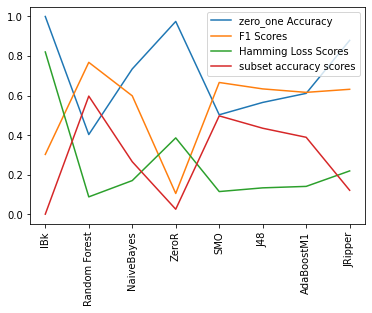

In [ ]:
plt.plot(list(zero_score.keys()), list(zero_score.values()))
plt.plot(list(cc_f1.keys()), list(cc_f1.values()))
plt.plot(list(cc_hamming.keys()), list(cc_hamming.values()))
plt.plot(list(cc_accuracies.keys()), list(cc_accuracies.values()))

plt.xticks(rotation=90)
plt.legend(['zero_one Accuracy','F1 Scores', 'Hamming Loss Scores', 'subset accuracy scores'])

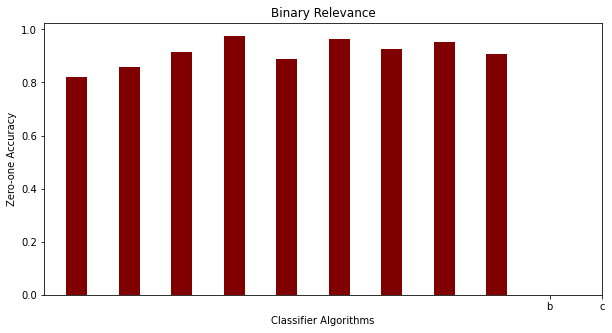

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(list(zero_score.keys()), list(zero_score.values()), color ='maroon', width = 0.4)
plt.bar(list(cc_f1.keys()), list(cc_f1.values()), color ='maroon', width = 0.4)
plt.xlabel("Classifier Algorithms")
plt.ylabel("Zero-one Accuracy")
plt.xticks(["b", "c"])
plt.title("Binary Relevance")
plt.show()

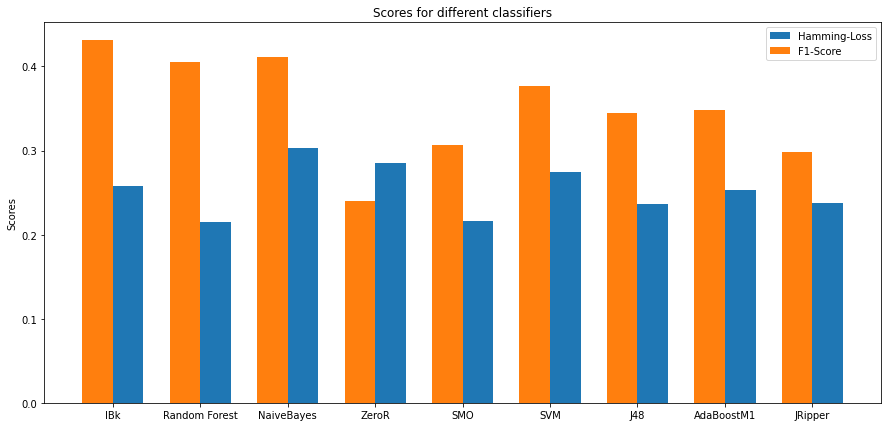

In [ ]:
import numpy as np

plt.figure(figsize=(15,7))
N = 9
#men_means = (20, 35, 30, 35, 27)
#women_means = (25, 32, 34, 20, 25)

ind = np.arange(N) 
width = 0.35
plt.bar(ind + width, list(cc_hamming.values()), width,
    label='Hamming-Loss')       
plt.bar(ind,list(cc_f1.values()) , width, label='F1-Score')


plt.ylabel('Scores')
plt.title('Scores for different classifiers')

plt.xticks(ind + width / 2, ("IBk", "Random Forest", "NaiveBayes", "ZeroR", "SMO", 'SVM' ,"J48", 'AdaBoostM1', 'JRipper', 'NaiveBayesMultinomial'))
plt.legend(loc='best')
plt.show()

In [ ]:



weka_clf = ['weka.classifiers.lazy.IBk',
'weka.classifiers.trees.RandomForest',
'weka.classifiers.bayes.NaiveBayes',
'weka.classifiers.rules.ZeroR', 'weka.classifiers.functions.SMO', "weka.classifiers.trees.J48", 'weka.classifiers.meta.AdaBoostM1']

base_model_names = ["IBk", "Random Forest", "NaiveBayes", "ZeroR", "SMO", "J48", 'AdaBoostM1']

zero_score = dict()
cc_accuracies = dict()
cc_f1 = dict()
cc_hamming = dict()

i = 0

for clf in weka_clf:
    meka = Meka(
            meka_classifier = "meka.classifiers.multilabel.CC", # 
            weka_classifier = clf, # 
            meka_classpath = meka_classpath, #obtained via download_meka
            java_command = '/usr/bin/java' # path to java executable
    )

    meka.fit(X_train, y_train)
    predictions = meka.predict(X_test)

    # zero-one-score
    z_one = zero_one_loss(y_test, predictions)
    zero_score[base_model_names[i]] = z_one
    # accuracy score
    accuracy = subset_acc(y_test, predictions)
    cc_accuracies[base_model_names[i]] = accuracy
    # F1 score
    cc_f1_score = f1_score(y_test, predictions, average='macro')
    cc_f1[base_model_names[i]] = cc_f1_score
    # hamming loss
    hamming = hamming_loss(y_test, predictions)
    cc_hamming[base_model_names[i]] = hamming

    i+=1

print('Classifier Chain')
print('------------------------------------------------------')
print("====================z_one Accuracy====================")
display(zero_score)
print("=================== F1 Scores====================")
display(cc_f1)
print("=================== Hamming Loss Scores====================")
display(cc_hamming)
print("=================== subset accuracy Scores====================")
display(cc_accuracies)

Classifier Chain
------------------------------------------------------
====================z_one Accuracy====================


{'IBk': 0.8193103448275862,
 'Random Forest': 0.8248275862068966,
 'NaiveBayes': 0.9020689655172414,
 'ZeroR': 0.9875862068965517,
 'SMO': 0.8510344827586207,
 'J48': 0.8786206896551724,
 'AdaBoostM1': 0.886896551724138}

=================== F1 Scores====================


{'IBk': 0.4310097731530584,
 'Random Forest': 0.35099424257917733,
 'NaiveBayes': 0.4305050955408004,
 'ZeroR': 0.11906666607491435,
 'SMO': 0.3313561383771514,
 'J48': 0.3799405454730588,
 'AdaBoostM1': 0.3302755593782595}

=================== Hamming Loss Scores====================


{'IBk': 0.25733990147783253,
 'Random Forest': 0.20532019704433496,
 'NaiveBayes': 0.32315270935960594,
 'ZeroR': 0.23881773399014777,
 'SMO': 0.2277832512315271,
 'J48': 0.2860098522167488,
 'AdaBoostM1': 0.24689655172413794}

=================== subset accuracy Scores====================


{'IBk': 0.18068965517241378,
 'Random Forest': 0.17517241379310344,
 'NaiveBayes': 0.09793103448275862,
 'ZeroR': 0.012413793103448275,
 'SMO': 0.1489655172413793,
 'J48': 0.12137931034482759,
 'AdaBoostM1': 0.11310344827586206}

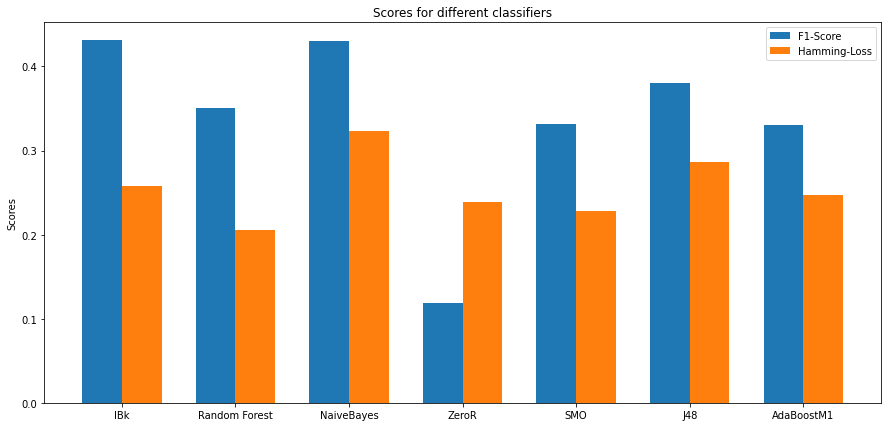

In [ ]:
import numpy as np

plt.figure(figsize=(15,7))
N = 7

ind = np.arange(N) 
width = 0.35
     
plt.bar(ind, list(cc_f1.values()) , width, label='F1-Score')
plt.bar(ind + width, list(cc_hamming.values()), width,
    label='Hamming-Loss')  

plt.ylabel('Scores')
plt.title('Scores for different classifiers')

plt.xticks(ind + width / 2, ("IBk", "Random Forest", "NaiveBayes", "ZeroR", "SMO", "J48", 'AdaBoostM1'))
plt.legend(loc='best')
plt.show()

In [ ]:



weka_clf = ['weka.classifiers.lazy.IBk',
'weka.classifiers.trees.RandomForest',
'weka.classifiers.bayes.NaiveBayes',
'weka.classifiers.rules.ZeroR', 'weka.classifiers.functions.SMO', "weka.classifiers.trees.J48", 'weka.classifiers.meta.AdaBoostM1']

base_model_names = ["IBk", "Random Forest", "NaiveBayes", "ZeroR", "SMO", "J48", 'AdaBoostM1']

zero_score = dict()
cc_accuracies = dict()
cc_f1 = dict()
cc_hamming = dict()

i = 0

for clf in weka_clf:
    meka = Meka(
            meka_classifier = "meka.classifiers.multilabel.MULAN -S CLR", # 
            weka_classifier = clf, # 
            meka_classpath = meka_classpath, #obtained via download_meka
            java_command = '/usr/bin/java' # path to java executable
    )

    meka.fit(X_train, y_train)
    predictions = meka.predict(X_test)

    # zero-one-score
    z_one = zero_one_loss(y_test, predictions)
    zero_score[base_model_names[i]] = z_one
    # accuracy score
    accuracy = subset_acc(y_test, predictions)
    cc_accuracies[base_model_names[i]] = accuracy
    # F1 score
    cc_f1_score = f1_score(y_test, predictions, average='macro')
    cc_f1[base_model_names[i]] = cc_f1_score
    # hamming loss
    hamming = hamming_loss(y_test, predictions)
    cc_hamming[base_model_names[i]] = hamming

    i+=1

print('Calibrated Label Ranking')
print('------------------------------------------------------')
print("====================z_one Accuracy====================")
display(zero_score)
print("=================== F1 Scores====================")
display(cc_f1)
print("=================== Hamming Loss Scores====================")
display(cc_hamming)
print("=================== subset accuracy Scores====================")
display(cc_accuracies)

Calibrated Label Ranking
------------------------------------------------------
====================z_one Accuracy====================


{'IBk': 0.863448275862069,
 'Random Forest': 0.9737931034482759,
 'NaiveBayes': 0.9213793103448276,
 'ZeroR': 0.9751724137931035,
 'SMO': 0.9682758620689655,
 'J48': 0.9131034482758621,
 'AdaBoostM1': 0.9613793103448276}

=================== F1 Scores====================


{'IBk': 0.41615823437977145,
 'Random Forest': 0.388416405621293,
 'NaiveBayes': 0.4261700374157796,
 'ZeroR': 0.23957008933277274,
 'SMO': 0.38861046489491874,
 'J48': 0.3989213322672234,
 'AdaBoostM1': 0.371152303028441}

=================== Hamming Loss Scores====================


{'IBk': 0.2482758620689655,
 'Random Forest': 0.2334975369458128,
 'NaiveBayes': 0.29211822660098524,
 'ZeroR': 0.28502463054187194,
 'SMO': 0.24226600985221675,
 'J48': 0.23290640394088669,
 'AdaBoostM1': 0.24354679802955664}

=================== subset accuracy Scores====================


{'IBk': 0.13655172413793104,
 'Random Forest': 0.02620689655172414,
 'NaiveBayes': 0.07862068965517241,
 'ZeroR': 0.02482758620689655,
 'SMO': 0.031724137931034485,
 'J48': 0.08689655172413793,
 'AdaBoostM1': 0.038620689655172416}

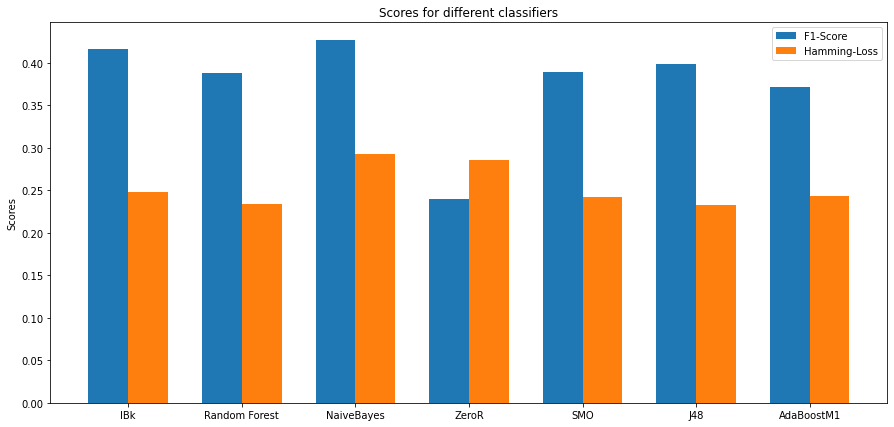

In [ ]:
import numpy as np

plt.figure(figsize=(15,7))
N = 7

ind = np.arange(N) 
width = 0.35
     
plt.bar(ind, list(cc_f1.values()) , width, label='F1-Score')
plt.bar(ind + width, list(cc_hamming.values()), width,
    label='Hamming-Loss')  

plt.ylabel('Scores')
plt.title('Scores for different classifiers')

plt.xticks(ind + width / 2, ("IBk", "Random Forest", "NaiveBayes", "ZeroR", "SMO", "J48", 'AdaBoostM1'))
plt.legend(loc='best')
plt.show()

In [ ]:




weka_clf = ['weka.classifiers.lazy.IBk',
'weka.classifiers.trees.RandomForest',
'weka.classifiers.bayes.NaiveBayes',
'weka.classifiers.rules.ZeroR', 'weka.classifiers.functions.SMO', "weka.classifiers.trees.J48", 'weka.classifiers.meta.AdaBoostM1']

base_model_names = ["IBk", "Random Forest", "NaiveBayes", "ZeroR", "SMO", "J48", 'AdaBoostM1']

zero_score = dict()
cc_accuracies = dict()
cc_f1 = dict()
cc_hamming = dict()

i = 0

for clf in weka_clf:
    meka = Meka(
            meka_classifier = "meka.classifiers.multilabel.LC", # 
            weka_classifier = clf, # 
            meka_classpath = meka_classpath, #obtained via download_meka
            java_command = '/usr/bin/java' # path to java executable
    )

    meka.fit(X_train, y_train)
    predictions = meka.predict(X_test)

    # zero-one-score
    z_one = zero_one_loss(y_test, predictions)
    zero_score[base_model_names[i]] = z_one
    # accuracy score
    accuracy = subset_acc(y_test, predictions)
    cc_accuracies[base_model_names[i]] = accuracy
    # F1 score
    cc_f1_score = f1_score(y_test, predictions, average='macro')
    cc_f1[base_model_names[i]] = cc_f1_score
    # hamming loss
    hamming = hamming_loss(y_test, predictions)
    cc_hamming[base_model_names[i]] = hamming

    i+=1

print('Label Combination / Label Powerset')
print('------------------------------------------------------')
print("====================z_one Accuracy====================")
display(zero_score)
print("=================== F1 Scores====================")
display(cc_f1)
print("=================== Hamming Loss Scores====================")
display(cc_hamming)
print("=================== subset accuracy Scores====================")
display(cc_accuracies)

Label Combination / Label Powerset
------------------------------------------------------
====================z_one Accuracy====================


{'IBk': 0.8193103448275862,
 'Random Forest': 0.766896551724138,
 'NaiveBayes': 0.8455172413793104,
 'ZeroR': 0.9117241379310345,
 'SMO': 0.7655172413793103,
 'J48': 0.8703448275862069,
 'AdaBoostM1': 0.8937931034482759}

=================== F1 Scores====================


{'IBk': 0.4310097731530584,
 'Random Forest': 0.3853306424840523,
 'NaiveBayes': 0.4287226179942739,
 'ZeroR': 0.18920342773214388,
 'SMO': 0.39986280690689274,
 'J48': 0.3633448147857615,
 'AdaBoostM1': 0.25362650646319}

=================== Hamming Loss Scores====================


{'IBk': 0.25733990147783253,
 'Random Forest': 0.218128078817734,
 'NaiveBayes': 0.2545812807881773,
 'ZeroR': 0.28866995073891627,
 'SMO': 0.21960591133004925,
 'J48': 0.2830541871921182,
 'AdaBoostM1': 0.26068965517241377}

=================== subset accuracy Scores====================


{'IBk': 0.18068965517241378,
 'Random Forest': 0.23310344827586207,
 'NaiveBayes': 0.15448275862068966,
 'ZeroR': 0.08827586206896551,
 'SMO': 0.23448275862068965,
 'J48': 0.1296551724137931,
 'AdaBoostM1': 0.10620689655172413}

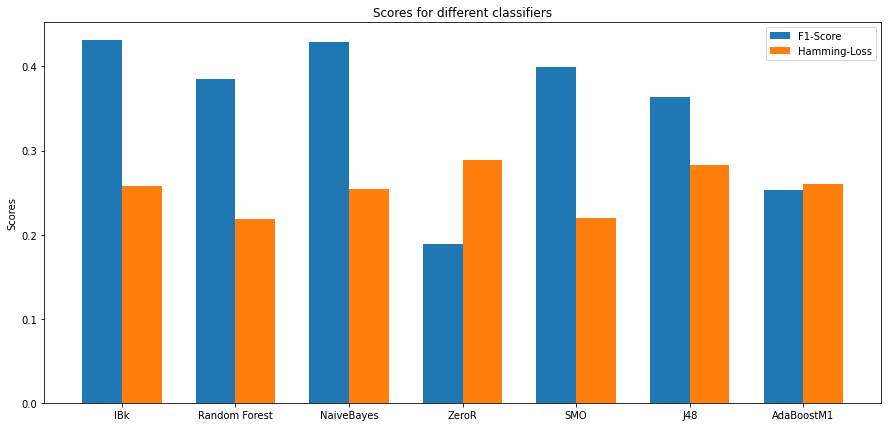

In [ ]:
import numpy as np

plt.figure(figsize=(15,7))
N = 7

ind = np.arange(N) 
width = 0.35
     
plt.bar(ind, list(cc_f1.values()) , width, label='F1-Score')
plt.bar(ind + width, list(cc_hamming.values()), width,
    label='Hamming-Loss')  

plt.ylabel('Scores')
plt.title('Scores for different classifiers')

plt.xticks(ind + width / 2, ("IBk", "Random Forest", "NaiveBayes", "ZeroR", "SMO", "J48", 'AdaBoostM1'))
plt.legend(loc='best')
plt.show()

In [ ]:





weka_clf = ['weka.classifiers.lazy.IBk',
'weka.classifiers.trees.RandomForest',
'weka.classifiers.bayes.NaiveBayes',
'weka.classifiers.rules.ZeroR', 'weka.classifiers.functions.SMO', "weka.classifiers.trees.J48", 'weka.classifiers.meta.AdaBoostM1']

base_model_names = ["IBk", "Random Forest", "NaiveBayes", "ZeroR", "SMO", "J48", 'AdaBoostM1']

zero_score = dict()
cc_accuracies = dict()
cc_f1 = dict()
cc_hamming = dict()

i = 0
for clf in weka_clf:
    meka = Meka(
            meka_classifier = "meka.classifiers.multilabel.PS -P 1 -N 1", # 
            weka_classifier = clf, # 
            meka_classpath = meka_classpath, #obtained via download_meka
            java_command = '/usr/bin/java' # path to java executable
    )

    meka.fit(X_train, y_train)
    predictions = meka.predict(X_test)

    # zero-one-score
    z_one = zero_one_loss(y_test, predictions)
    zero_score[base_model_names[i]] = z_one
    # accuracy score
    accuracy = subset_acc(y_test, predictions)
    cc_accuracies[base_model_names[i]] = accuracy
    # F1 score
    cc_f1_score = f1_score(y_test, predictions, average='macro')
    cc_f1[base_model_names[i]] = cc_f1_score
    # hamming loss
    hamming = hamming_loss(y_test, predictions)
    cc_hamming[base_model_names[i]] = hamming

    i+=1

print('Pruned Sets (Pruned Label Powerset)')
print('------------------------------------------------------')
print("====================z_one Accuracy====================")
display(zero_score)
print("=================== F1 Scores====================")
display(cc_f1)
print("=================== Hamming Loss Scores====================")
display(cc_hamming)
print("=================== subset accuracy Scores====================")
display(cc_accuracies)


Pruned Sets (Pruned Label Powerset)
------------------------------------------------------
====================z_one Accuracy====================


{'IBk': 0.816551724137931,
 'Random Forest': 0.7475862068965518,
 'NaiveBayes': 0.8427586206896551,
 'ZeroR': 0.9117241379310345,
 'SMO': 0.7586206896551724,
 'J48': 0.9062068965517242,
 'AdaBoostM1': 0.8937931034482759}

=================== F1 Scores====================


{'IBk': 0.4293935803022561,
 'Random Forest': 0.38400393323258203,
 'NaiveBayes': 0.4328279872919357,
 'ZeroR': 0.18920342773214388,
 'SMO': 0.40780071288782604,
 'J48': 0.3603727864216838,
 'AdaBoostM1': 0.25362650646319}

=================== Hamming Loss Scores====================


{'IBk': 0.2553694581280788,
 'Random Forest': 0.21832512315270935,
 'NaiveBayes': 0.2553694581280788,
 'ZeroR': 0.28866995073891627,
 'SMO': 0.21911330049261082,
 'J48': 0.2952709359605911,
 'AdaBoostM1': 0.26068965517241377}

=================== subset accuracy Scores====================


{'IBk': 0.18344827586206897,
 'Random Forest': 0.2524137931034483,
 'NaiveBayes': 0.15724137931034482,
 'ZeroR': 0.08827586206896551,
 'SMO': 0.2413793103448276,
 'J48': 0.09379310344827586,
 'AdaBoostM1': 0.10620689655172413}

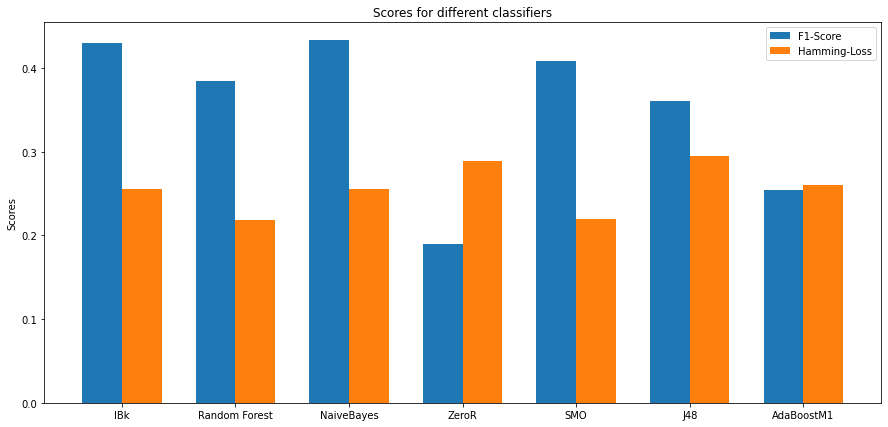

In [ ]:
import numpy as np

plt.figure(figsize=(15,7))
N = 7

ind = np.arange(N) 
width = 0.35
     
plt.bar(ind, list(cc_f1.values()) , width, label='F1-Score')
plt.bar(ind + width, list(cc_hamming.values()), width,
    label='Hamming-Loss')  

plt.ylabel('Scores')
plt.title('Scores for different classifiers')

plt.xticks(ind + width / 2, ("IBk", "Random Forest", "NaiveBayes", "ZeroR", "SMO", "J48", 'AdaBoostM1'))
plt.legend(loc='best')
plt.show()